In [1]:
# !mamba install -c conda-forge cf_xarray -y
# !mamba install -c conda-forge clisops -y
# !mamba install -c conda-forge nc-time-axis -y

In [2]:
from pathlib import Path
import intake
import xarray as xr
import cf_xarray as cfxr
xr.set_options(display_style='html')
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import numpy as np
from clisops.core.subset import subset_bbox
import pandas as pd
import nc_time_axis

import esmpy as ESMF
import xesmf as xe

# Sea ice %

In [3]:
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"

filename = "arctic_dset_ice.nc"
full_path = out_folder / filename
var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
arctic_ice_dset = xr.open_dataset(full_path)
arctic_ice_dset

<xarray.Dataset> Size: 4GB
Dimensions:             (i: 360, j: 291, member_id: 65, dcpp_init_year: 1,
                         time: 132, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 285 286 287 288 289 290
    latitude            (j, i) float64 838kB ...
    longitude           (j, i) float64 838kB ...
  * time                (time) object 1kB 2004-01-16 12:00:00 ... 2014-12-16 ...
    time_bnds           (time, bnds) object 2kB ...
    type                |S7 7B ...
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
  * member_id           (member_id) <U9 2kB 'r10i1p1f1' ... 'r9i1p2f1'
  * dcpp_init_year      (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds, vertices
Data variables:
    siconc              (member_id, dcpp_init_year, time, j, i) float32 4GB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        SImon
    intake_esm_attrs:variable_id:     siconc
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.SImon.gn

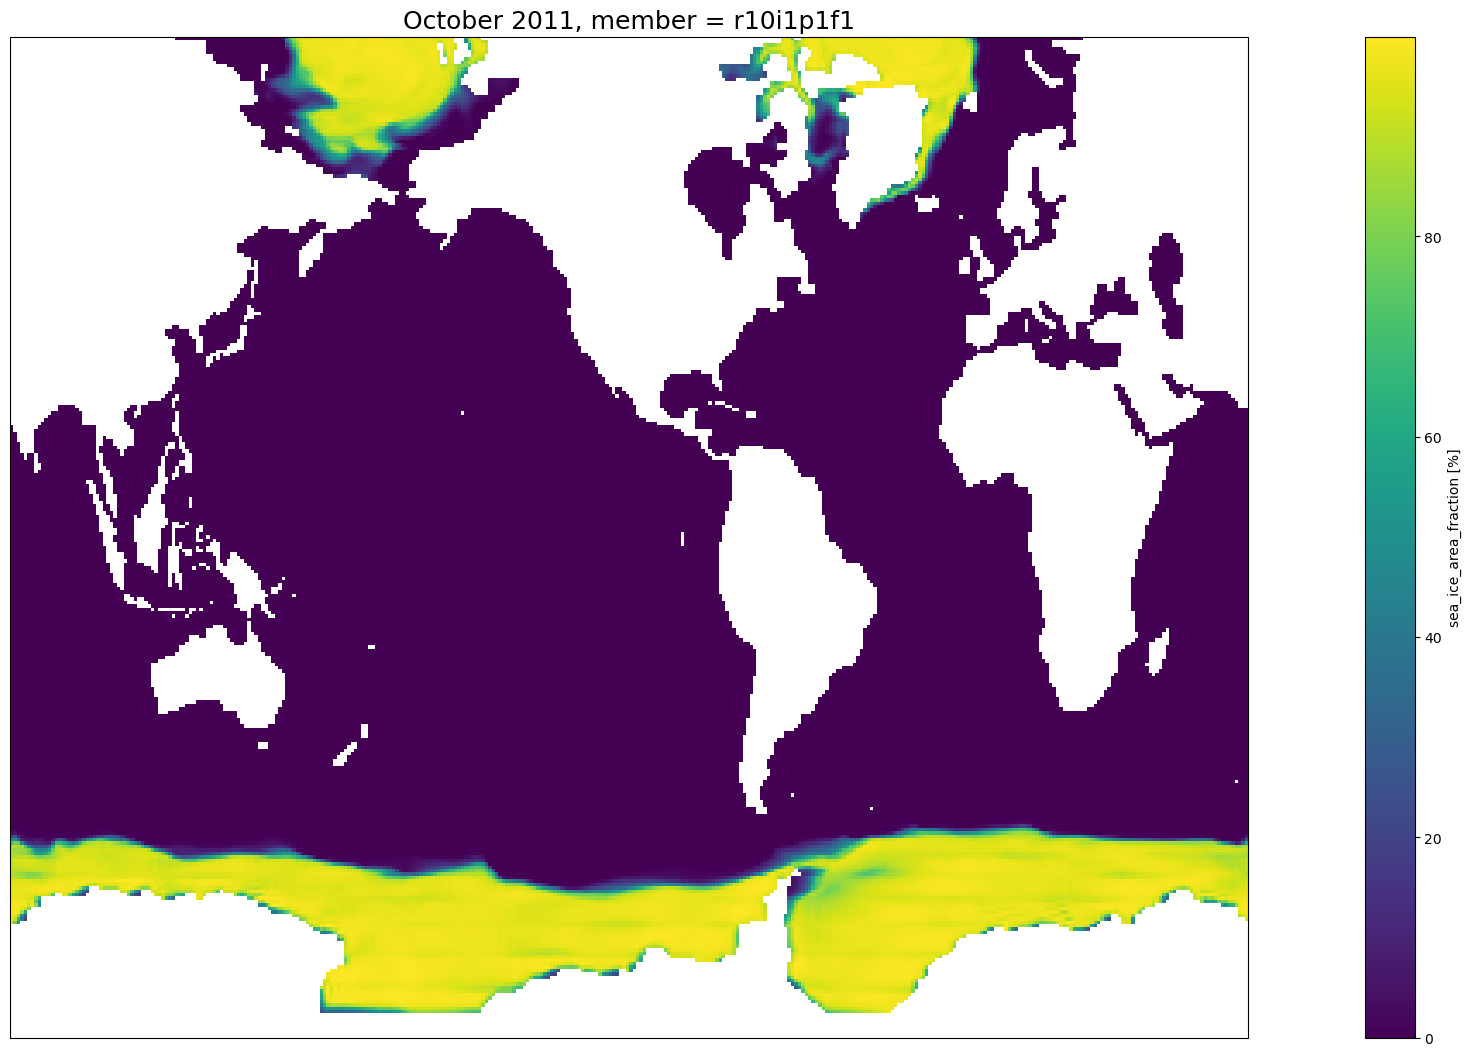

In [4]:
fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test = arctic_ice_dset.sel(time = slice('2011-10', '2018'))
ds_test.siconc.isel(time=0, member_id=0).plot()
plt.title(f'{ds_test.time.values[0].strftime("%B %Y")}, member = {ds_test.member_id.values[0]}', fontsize=18);

## Regrid

In [5]:
# ds_out = xe.util.grid_global(2, 1)
# ds_out

In [6]:
# dr = arctic_ice_dset['siconc'].isel(member_id=0, time=0)
# dr

In [7]:
# regridder = xe.Regridder(arctic_ice_dset, ds_out, "bilinear")
# dr_out = regridder(dr)

In [8]:
# dr_out

In [9]:
# plt.figure(figsize=(12, 4))
# ax = plt.axes(projection=ccrs.PlateCarree())
# dr_out[0].plot.pcolormesh(ax=ax, x="lon", y="lat")
# ax.coastlines()

In [10]:
# dr_out[0].sel(lat = slice(66.33, 90))

In [11]:
# dr_out.plot(x='lon', y='lat')
# plt.scatter(dr_out.lon, dr_out.lat, s = 0.1)

# lat = 66.33
# lon = 0
# abslat = np.abs(dr_out.lat-lat)
# abslon = np.abs(dr_out.lon-lon)

# c = np.maximum(abslon, abslat)
# (xloc, yloc) = np.where(c == np.min(c))

# point_ds = dr_out.sel(x=xloc, y=yloc)

# plt.scatter(lon, lat, color='b')
# plt.text(lon, lat, 'requested')

# plt.scatter(point_ds.lon, point_ds.lat, color='r')
# # plt.text(point_ds.lon, point_ds.lat, 'nearest')

In [12]:
# lat = dr_out.lat
# lat

In [13]:
# url_obs = "https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/datasets/gridded_obs/nrcan_v2.ncml"


In [14]:
# ds_obs = xr.open_dataset(url_obs).sel(time="1993-05-20").drop("time")

# # Subset over the Hudson Bay and the Labrador Sea for the example
# bbox = dict(lon_bnds=[-180, 180], lat_bnds=[66.33, 90])
# ds_tgt = subset_bbox(ds_obs, **bbox)
# ds_tgt

In [15]:
# ds_tgt.cf.plot.scatter(x="longitude", y="latitude", s=0.1)
# plt.title("Target regular grid");

In [16]:
# ds_in = arctic_ice_dset.sel(time = slice('2011-10', '2018')).isel(member_id=0)
# ds_in

In [17]:
# reg_bil = xe.Regridder(ds_in, ds_tgt, "bilinear")
# reg_bil

In [18]:
# # xesmf/frontend.py:476: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
# # warnings.filterwarnings("ignore", category=FutureWarning)

# # Apply the regridding weights to the input sea ice concentration data
# sic_bil = reg_bil(ds_in.siconc)

# # Plot the results
# sic_bil.isel(time=0).plot()
# plt.title("Regridded sic data (Jan 2020)");


## rectilinear -> arctic

In [19]:
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"
filename = "arctic_dset_clt_grid.nc"
full_path = out_folder / filename

arctic_grid_clt = xr.open_dataset(full_path)
obs_arctic = xr.open_dataset(full_path).sel(time="2011-10-16").drop("time")
obs_arctic

/var/folders/m4/cscgyrkx4yb7s54p03r47dfw0000gn/T/ipykernel_9884/1751867798.py:7: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  obs_arctic = xr.open_dataset(full_path).sel(time="2011-10-16").drop("time")


<xarray.Dataset> Size: 272kB
Dimensions:         (member_id: 65, dcpp_init_year: 1, time: 1, lat: 8,
                     lon: 128, bnds: 2)
Coordinates:
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 128B ...
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
    lon_bnds        (lon, bnds) float64 2kB ...
    time_bnds       (time, bnds) object 16B ...
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: time, bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 266kB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

In [20]:
bbox = dict(lon_bnds=[0, 360], lat_bnds=[66.33, 90])
arctic_tgt = subset_bbox(obs_arctic, **bbox)
arctic_tgt

<xarray.Dataset> Size: 272kB
Dimensions:         (member_id: 65, dcpp_init_year: 1, time: 1, lat: 8,
                     lon: 128, bnds: 2)
Coordinates:
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 128B 66.99 69.78 69.78 ... 86.58 90.0
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
    lon_bnds        (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 358.6
    time_bnds       (time, bnds) object 16B 2011-10-01 00:00:00 2011-11-01 00...
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: time, bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 266kB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

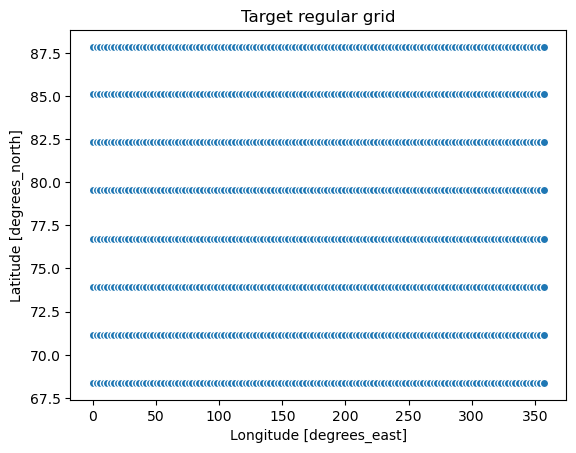

In [21]:
arctic_tgt.cf.plot.scatter(x="longitude", y="latitude")
plt.title("Target regular grid");

In [22]:
ds_in = arctic_ice_dset.sel(time = slice('2004', '2014')).isel(member_id=0)
ds_in

<xarray.Dataset> Size: 64MB
Dimensions:             (i: 360, j: 291, dcpp_init_year: 1, time: 132, bnds: 2,
                         vertices: 4)
Coordinates:
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 285 286 287 288 289 290
    latitude            (j, i) float64 838kB ...
    longitude           (j, i) float64 838kB ...
  * time                (time) object 1kB 2004-01-16 12:00:00 ... 2014-12-16 ...
    time_bnds           (time, bnds) object 2kB ...
    type                |S7 7B ...
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
    member_id           <U9 36B 'r10i1p1f1'
  * dcpp_init_year      (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds, vertices
Data variables:
    siconc              (dcpp_init_year, time, j, i) float32 55MB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        SImon
    intake_esm_attrs:variable_id:     siconc
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.SImon.gn

In [23]:
arctic_bil = xe.Regridder(ds_in, arctic_tgt, "bilinear")
arctic_bil

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_291x360_8x128.nc 
Reuse pre-computed weights? False 
Input grid shape:           (291, 360) 
Output grid shape:          (8, 128) 
Periodic in longitude?      False

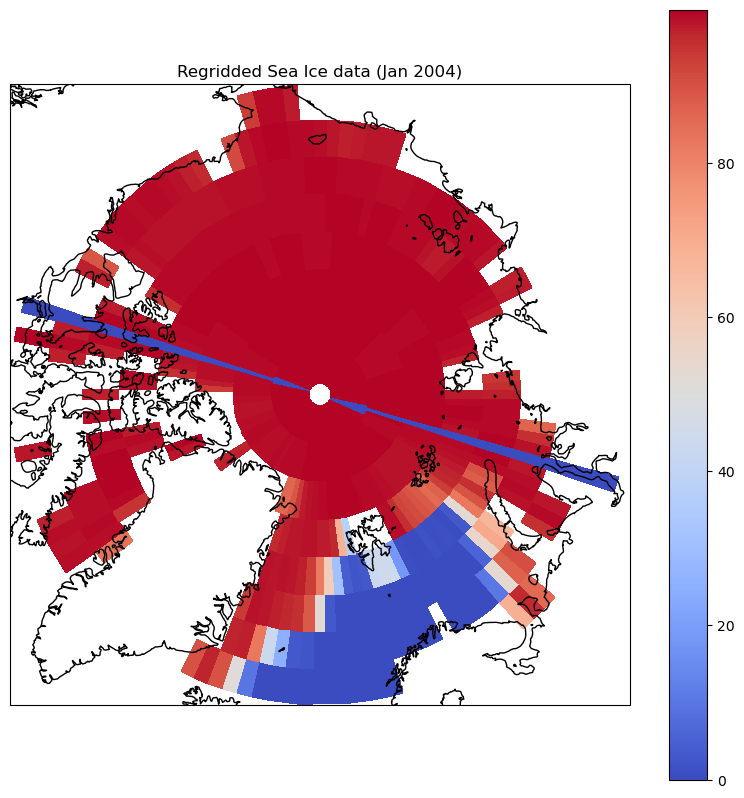

In [24]:
# Apply the regridding weights to the input sea ice concentration data
sic_arctic = arctic_bil(ds_in.siconc)

fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
sic_arctic.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("Regridded Sea Ice data (Jan 2004)");

## Plot Sea Ice and CLT

In [25]:
sic_arctic

<xarray.DataArray (dcpp_init_year: 1, time: 132, lat: 8, lon: 128)> Size: 541kB
array([[[[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          2.4779669e+01, 2.9980657e+00, 2.3392875e+00],
         [5.2525768e+01, 3.0290589e+00, 1.9162213e-03, ...,
          9.6645874e+01, 9.5452019e+01, 8.8500343e+01],
         ...,
         [9.9272781e+01, 9.9475838e+01, 9.9630569e+01, ...,
          9.7653885e+01, 9.8491119e+01, 9.8925430e+01],
         [9.9888680e+01, 9.9885559e+01, 9.9873756e+01, ...,
          9.9727249e+01, 9.9816422e+01, 9.9869652e+01],
         [9.9773422e+01, 9.9771141e+01, 9.9770287e+01, ...,
          9.9781380e+01, 9.9778603e+01, 9.9776009e+01]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [8.8909911e-03, 7.6279081e-03, 2.1379166e-03, ...,
          1.9450495e+01, 1.5046322e+00, 3.4035249e+00],
         [7.6785912e+01, 2.6269180e+01, 3.6452022e-01, ...,
          9.6351028e+01, 9.5873924e+01, 9.5054405e+01],
...
         [9.8158813e+01, 9.7175468e+01, 9.6680580e+01, ...,
          9.9706482e+01, 9.9417679e+01, 9.8929817e+01],
         [9.9091591e+01, 9.8854034e+01, 9.8541496e+01, ...,
          9.9288521e+01, 9.9300102e+01, 9.9235985e+01],
         [9.9435600e+01, 9.9435272e+01, 9.9410400e+01, ...,
          9.9420403e+01, 9.9424377e+01, 9.9429237e+01]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,
          0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [7.8851543e-03, 0.0000000e+00, 0.0000000e+00, ...,
          2.8022514e+01, 3.8993249e+00, 1.0743906e-01],
         ...,
         [9.9109116e+01, 9.8900391e+01, 9.8708328e+01, ...,
          9.9678596e+01, 9.9450554e+01, 9.9356354e+01],
         [9.9606911e+01, 9.9576553e+01, 9.9546623e+01, ...,
          9.9681122e+01, 9.9664955e+01, 9.9637840e+01],
         [9.9673874e+01, 9.9660995e+01, 9.9653839e+01, ...,
          9.9714684e+01, 9.9701607e+01, 9.9688019e+01]]]], dtype=float32)
Coordinates:
  * time            (time) object 1kB 2004-01-16 12:00:00 ... 2014-12-16 12:0...
    type            |S7 7B b'sea_ice'
    member_id       <U9 36B 'r10i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
Attributes:
    regrid_method:  bilinear

Text(0, 0.5, '% Sea Ice Coverage')

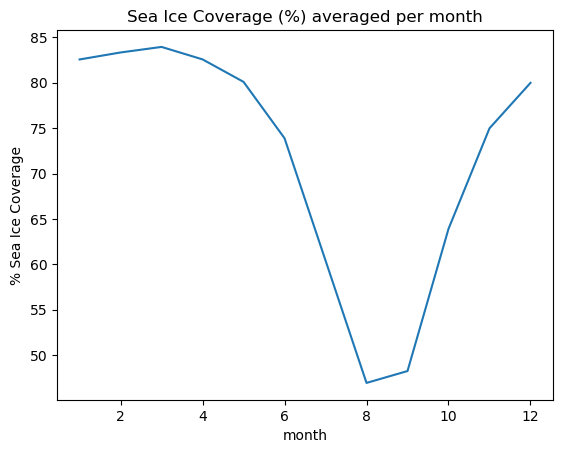

In [26]:
# np.mean(sic_arctic.isel(time=2))
mean_ice_test = sic_arctic.groupby('time.month').mean('time').mean(['lon', 'lat'])
mean_ice_test.plot()
plt.title("Sea Ice Coverage (%) averaged per month")
plt.ylabel("% Sea Ice Coverage")

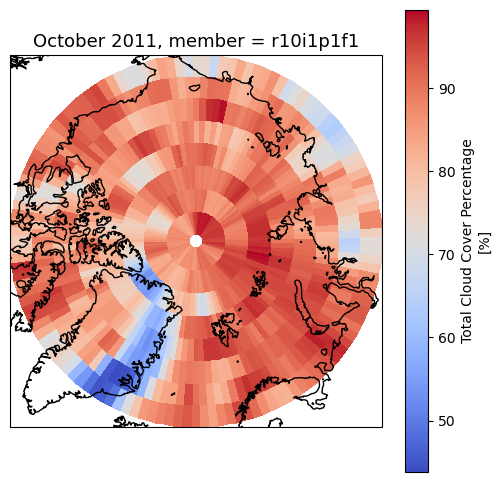

In [27]:
### cloud data:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test = arctic_grid_clt.sel(time = slice('2011-10', '2018'))
ds_test.clt.isel(time=0, member_id=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title(f'{ds_test.time.values[0].strftime("%B %Y")}, member = {ds_test.member_id.values[0]}', fontsize=13);

In [28]:
arctic_grid_clt

<xarray.Dataset> Size: 35MB
Dimensions:         (member_id: 65, dcpp_init_year: 1, time: 132, lat: 8,
                     lon: 128, bnds: 2)
Coordinates:
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 128B ...
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
    lon_bnds        (lon, bnds) float64 2kB ...
  * time            (time) object 1kB 2004-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds       (time, bnds) object 2kB ...
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 35MB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

Text(0.5, 0.98, 'Comparison of averaged montly cloud and sea ice fraction\n')

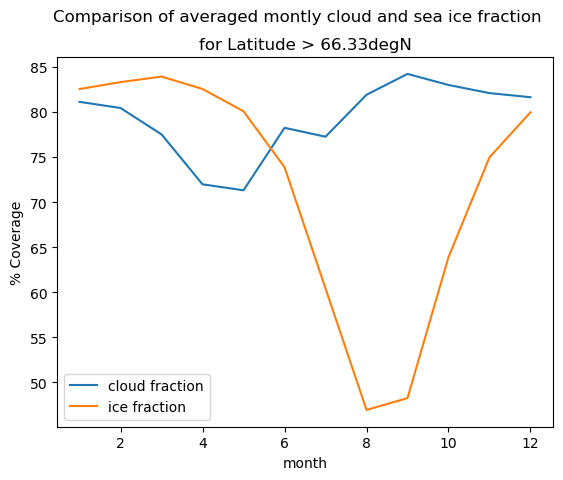

In [29]:
mean_cloud_test = arctic_grid_clt.groupby('time.month').mean('time').mean(['lon', 'lat'])
mean_cloud_test.mean('member_id').clt.plot(label = "cloud fraction")
mean_ice_test.plot(label="ice fraction")
plt.legend()
plt.ylabel("% Coverage")
plt.title("for Latitude > 66.33degN")
plt.suptitle("Comparison of averaged montly cloud and sea ice fraction\n")

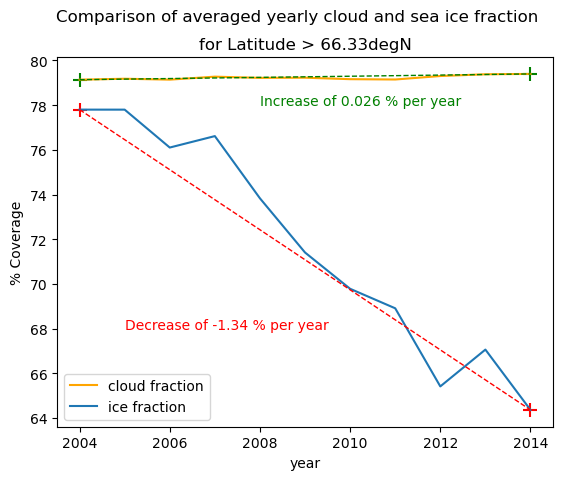

In [30]:
mean_cloud_test_yr = arctic_grid_clt.groupby('time.year').mean('time').mean(['lon', 'lat'])
mean_cloud_test_yr.mean('member_id').clt.plot(label = "cloud fraction", c="orange")

mean_ice_test_yr = sic_arctic.groupby('time.year').mean('time').mean(['lon', 'lat'])
mean_ice_test_yr.plot(label="ice fraction")
plt.legend()
plt.ylabel("% Coverage")
plt.title("for Latitude > 66.33degN")
plt.suptitle("Comparison of averaged yearly cloud and sea ice fraction\n")

### Plot out slope of lines:
x2 = mean_cloud_test_yr.mean('member_id').year[-1]
y2 = mean_cloud_test_yr.mean('member_id').clt[-1]

x1 = mean_cloud_test_yr.mean('member_id').year[0]
y1 = mean_cloud_test_yr.mean('member_id').clt[0]

plt.scatter(x1, y1, c="g", marker = "+", s=100)
plt.scatter(x2, y2,c="g", marker = "+", s=100)
plt.plot((x1,x2),(y1,y2), linestyle = "--", c = "g", linewidth = 1)
plt.annotate(f'Increase of {((y2-y1)/(x2-x1)).values[0]:0.3f} % per year', xy = (2008,78), c="g") 

x3 = mean_ice_test_yr.year[0]
y3 = mean_ice_test_yr.values[0][0]

x4 = mean_ice_test_yr.year[-1]
y4 = mean_ice_test_yr.values[0][-1]

plt.scatter(x3, y3, c="r", marker = "+", s=100)
plt.scatter(x4, y4,c="r", marker = "+", s=100)
plt.plot((x3,x4),(y3,y4), linestyle = "--", c = "r", linewidth = 1)
plt.annotate(f'Decrease of {((y4-y3)/(x4-x3)).values:0.2f} % per year', xy = (2005,68), c="r");

In [31]:
### Testing for plotting averaged data for one time step (instead of monthly or yearly average)

In [32]:
# mean_ice_test_yr.year[0]

In [33]:
# mean_cloud_test_yr.mean('member_id').clt[-1]

In [34]:
# sic_arctic.isel(time=0)

Text(0, 0.5, '% Sea Ice Coverage')

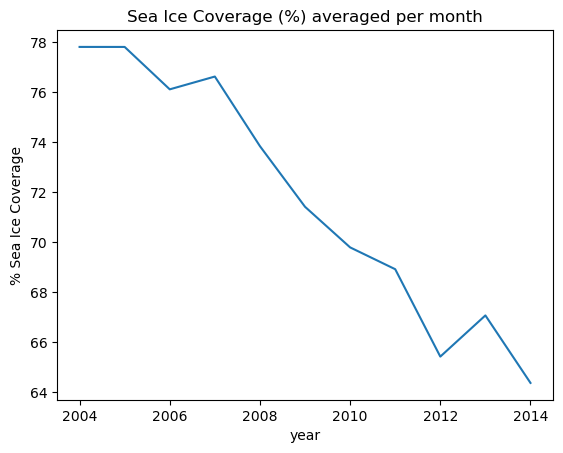

In [35]:
mean_ice_test = sic_arctic.groupby('time.year').mean('time').mean(['lon', 'lat'])
mean_ice_test.plot()
plt.title("Sea Ice Coverage (%) averaged per month")
plt.ylabel("% Sea Ice Coverage")

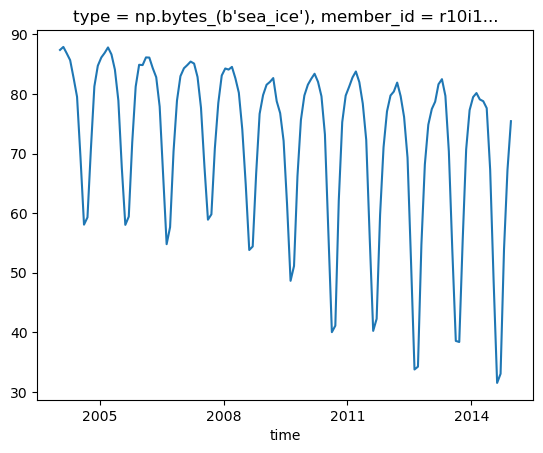

In [36]:
mean_ice_test_day = sic_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_ice_test_day.plot()

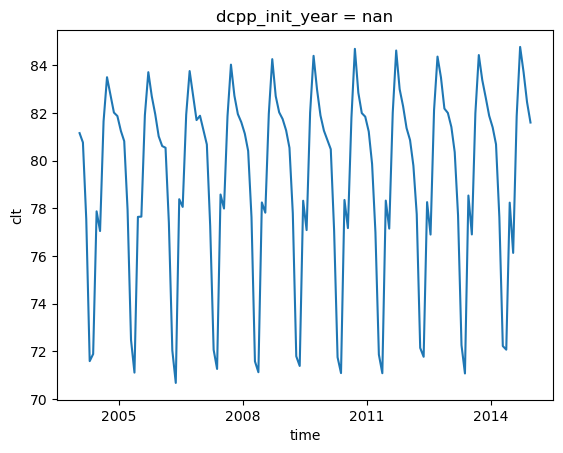

In [37]:
mean_cloud_test_day = arctic_grid_clt.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cloud_test_day.mean('member_id').clt.plot()

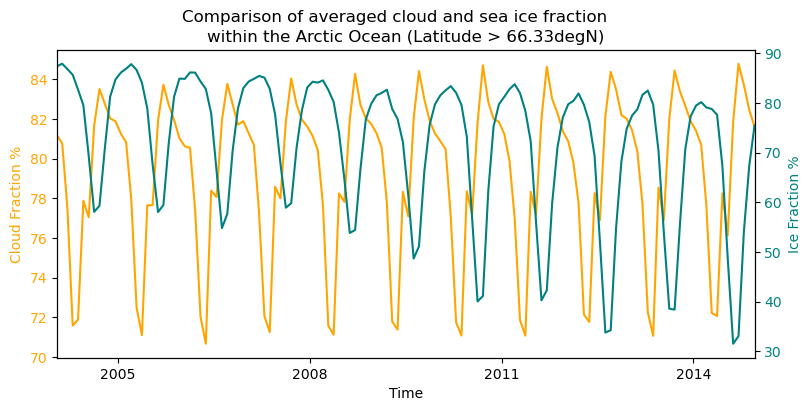

In [38]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()

mean_cloud_test_day = arctic_grid_clt.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cloud_test_day.mean('member_id').clt.plot(ax=ax1, label = "cloud fraction", c="orange")
ax1.set_ylabel("Cloud Fraction %", color = "orange")
ax1.tick_params(axis = "y", labelcolor="orange")
ax1.set_title("")

mean_ice_test_day = sic_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_ice_test_day.plot(ax=ax2, label="ice fraction", c="teal")
ax2.tick_params(axis='y', labelcolor="teal")
ax2.set_ylabel("Ice Fraction %", color="teal")
plt.title("for Latitude > 66.33degN")
plt.suptitle("Comparison of averaged day cloud and Sea Surface Temperature\n")

plt.xlim(mean_ice_test_day.time[0].item(), mean_ice_test_day.time[-1].item())
ax1.set_xlabel("Time")
plt.title("within the Arctic Ocean (Latitude > 66.33degN)")
plt.suptitle("Comparison of averaged cloud and sea ice fraction\n");


# SST

In [39]:
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"

filename = "arctic_dset_SST.nc"
full_path = out_folder / filename
# var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
arctic_SST_dset = xr.open_dataset(full_path)
arctic_SST_dset

<xarray.Dataset> Size: 4GB
Dimensions:             (i: 360, j: 291, time: 132, bnds: 2, member_id: 65,
                         dcpp_init_year: 1, vertices: 4)
Coordinates:
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 285 286 287 288 289 290
    latitude            (j, i) float64 838kB ...
    longitude           (j, i) float64 838kB ...
  * time                (time) object 1kB 2004-01-16 12:00:00 ... 2014-12-16 ...
    time_bnds           (time, bnds) object 2kB ...
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
  * member_id           (member_id) <U9 2kB 'r10i1p1f1' ... 'r9i1p2f1'
  * dcpp_init_year      (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (member_id, dcpp_init_year, time, j, i) float32 4GB ...
Attributes: (12/47)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    contact:                          ec.cccma.info-info.ccmac.ec@canada.ca
    ...                               ...
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Omon.gn

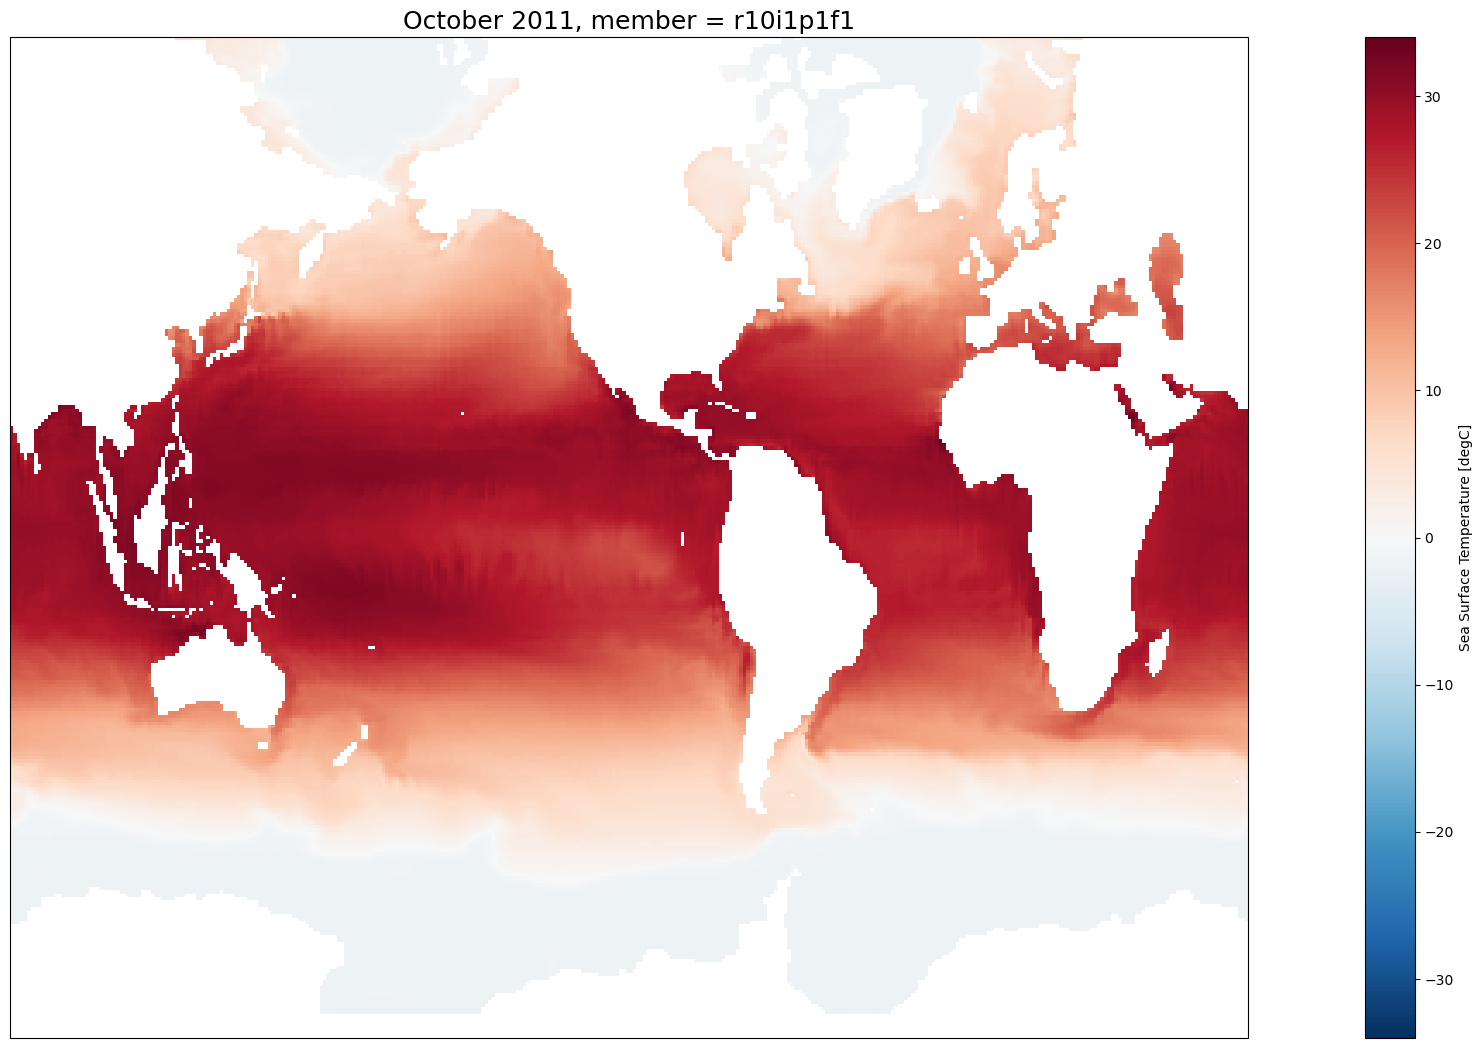

In [40]:
fig = plt.figure(1, figsize=[30,13])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test = arctic_SST_dset.sel(time = slice('2011-10', '2018'))
ds_test.tos.isel(time=0, member_id=0).plot()
plt.title(f'{ds_test.time.values[0].strftime("%B %Y")}, member = {ds_test.member_id.values[0]}', fontsize=18);

## Regrid (relies on code above)

In [41]:
ds_in = arctic_SST_dset.sel(time = slice('2004', '2014')).isel(member_id=0)
arctic_bil = xe.Regridder(ds_in, arctic_tgt, "bilinear")

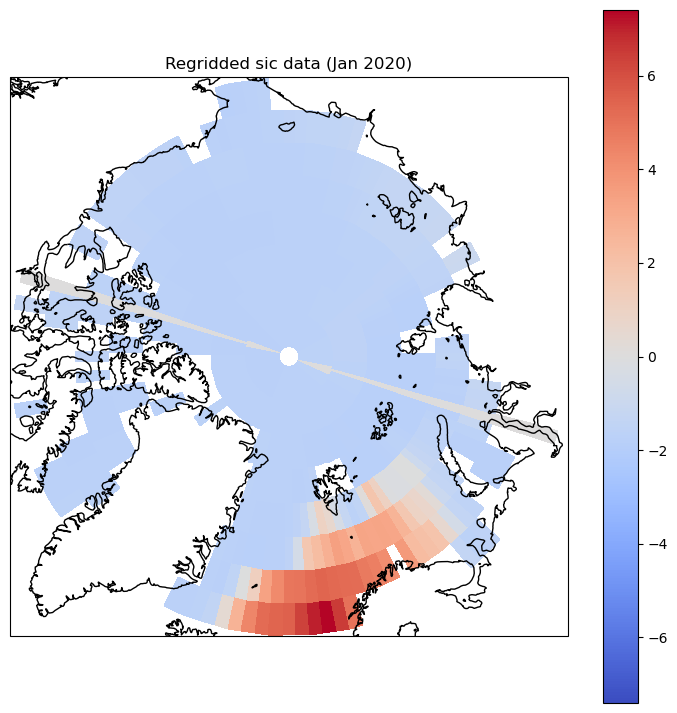

In [42]:
SST_arctic = arctic_bil(ds_in.tos)

fig = plt.figure(1, figsize=(9,9))

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
SST_arctic.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("Regridded sic data (Jan 2020)");

In [43]:
SST_arctic

<xarray.DataArray (dcpp_init_year: 1, time: 132, lat: 8, lon: 128)> Size: 541kB
array([[[[ 5.5106015 ,  6.3228374 ,  7.0196114 , ...,  4.3447285 ,
           5.259138  ,  5.400073  ],
         [ 4.890057  ,  4.963152  ,  5.256028  , ...,  1.1987752 ,
           3.389917  ,  4.2382016 ],
         [-1.6107655 , -0.5429099 ,  1.7211642 , ..., -1.7952635 ,
          -1.7790331 , -1.7570446 ],
         ...,
         [-1.718196  , -1.7183713 , -1.7200167 , ..., -1.701463  ,
          -1.7131368 , -1.7182307 ],
         [-1.7239352 , -1.7204733 , -1.7170105 , ..., -1.7321373 ,
          -1.7300153 , -1.7272571 ],
         [-1.7214298 , -1.7191199 , -1.7167073 , ..., -1.72809   ,
          -1.7259035 , -1.7236832 ]],

        [[ 5.1460648 ,  5.8981824 ,  6.6651306 , ...,  4.0622487 ,
           4.9891734 ,  5.0848618 ],
         [ 4.392191  ,  4.3259125 ,  4.784187  , ...,  2.3312833 ,
           3.9555151 ,  3.9645352 ],
         [-1.629373  , -0.78673434,  1.0858396 , ..., -1.8144311 ,
          -1.7944894 , -1.7768584 ],
...
         [-1.7070321 , -1.7182533 , -1.7338251 , ..., -1.6783861 ,
          -1.6888518 , -1.6991086 ],
         [-1.7549142 , -1.7587    , -1.7608566 , ..., -1.730517  ,
          -1.7409046 , -1.7490017 ],
         [-1.7877704 , -1.7920369 , -1.7952714 , ..., -1.7739403 ,
          -1.7785422 , -1.7831596 ]],

        [[ 7.4209623 ,  7.748331  ,  8.0561905 , ...,  5.589109  ,
           6.678908  ,  6.9056706 ],
         [ 5.184129  ,  6.943413  ,  7.4850616 , ...,  5.4602656 ,
           5.2239366 ,  4.522068  ],
         [ 2.8006344 ,  4.1508904 ,  5.218917  , ..., -0.0458875 ,
           0.8708084 ,  1.6011834 ],
         ...,
         [-1.7369169 , -1.7488563 , -1.7645129 , ..., -1.7077253 ,
          -1.7184819 , -1.727523  ],
         [-1.7759279 , -1.7795584 , -1.7812145 , ..., -1.7508858 ,
          -1.7614975 , -1.7697691 ],
         [-1.8077439 , -1.8104354 , -1.8122994 , ..., -1.7988012 ,
          -1.8017792 , -1.8047662 ]]]], dtype=float32)
Coordinates:
  * time            (time) object 1kB 2004-01-16 12:00:00 ... 2014-12-16 12:0...
    member_id       <U9 36B 'r10i1p1f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
Attributes:
    regrid_method:  bilinear

## Plot

### Cloud and SST

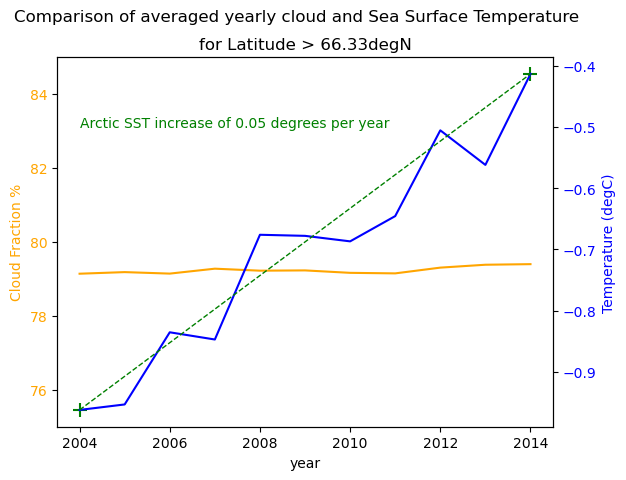

In [44]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

mean_cloud_test_yr = arctic_grid_clt.groupby('time.year').mean('time').mean(['lon', 'lat'])
mean_cloud_test_yr.mean('member_id').clt.plot(ax = ax1, label = "cloud fraction", c="orange")
ax1.set_ylabel("Cloud Fraction %", color = "orange")
ax1.tick_params(axis = "y", labelcolor="orange")
ax1.set_title("")
ax1.set_ylim(75,85)

mean_SST_test_yr = SST_arctic.groupby('time.year').mean('time').mean(['lon', 'lat'])
mean_SST_test_yr.plot(label="SST", c="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylabel("Temperature (degC)", color="blue")
plt.title("for Latitude > 66.33degN")
plt.suptitle("Comparison of averaged yearly cloud and Sea Surface Temperature\n")

### Plot out slope of SST:

x3 = mean_SST_test_yr.year[0]
y3 = mean_SST_test_yr.values[0][0]

x4 = mean_SST_test_yr.year[-1]
y4 = mean_SST_test_yr.values[0][-1]

plt.scatter(x3, y3, c="g", marker = "+", s=100)
plt.scatter(x4, y4,c="g", marker = "+", s=100)
plt.plot((x3,x4),(y3,y4), linestyle = "--", c = "g", linewidth = 1)
plt.annotate(f'Arctic SST increase of {((y4-y3)/(x4-x3)).values:0.2f} degrees per year', xy = (2004,-0.5), c="g");

# info on setting two y-axes: 
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

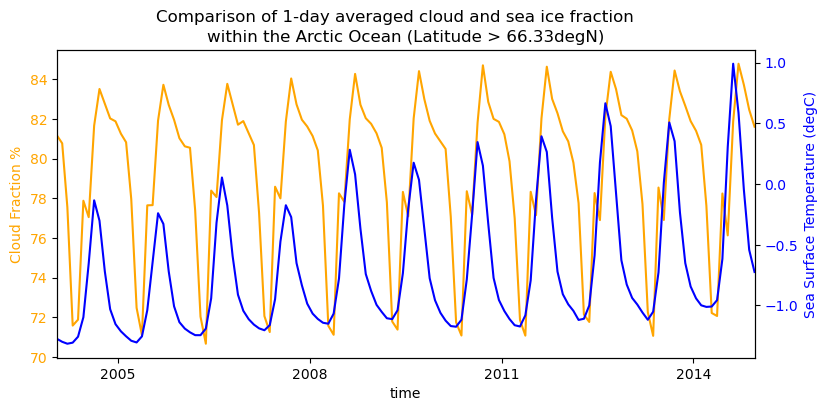

In [45]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()

mean_cloud_test_day = arctic_grid_clt.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cloud_test_day.mean('member_id').clt.plot(ax=ax1, label = "cloud fraction", c="orange")
ax1.set_ylabel("Cloud Fraction %", color = "orange")
ax1.tick_params(axis = "y", labelcolor="orange")
ax1.set_title("")

mean_SST_test_day = SST_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_SST_test_day.plot(label="Sea Surface Temperature", c="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylabel("Sea Surface Temperature (degC)", color="blue")

plt.xlim(mean_ice_test_day.time[0].item(), mean_ice_test_day.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN)")
plt.suptitle("Comparison of 1-day averaged cloud and sea ice fraction\n");

### sea ice and SST

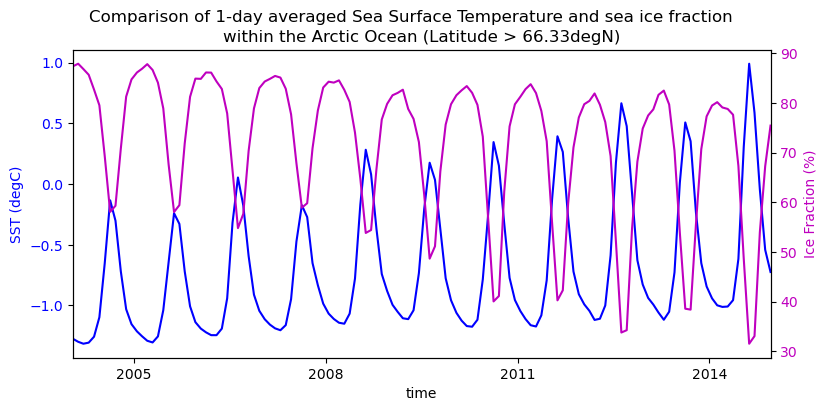

In [46]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()
mean_SST_test_day = SST_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_SST_test_day.plot(ax=ax1,label="Sea Surface Temperature", c="blue")
ax1.set_ylabel("SST (degC)", color = "blue")
ax1.tick_params(axis = "y", labelcolor="Blue")
ax1.set_title("")

mean_ice_test_day = sic_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_ice_test_day.plot(ax=ax2, label="Sea Ice Fraction", c="m")
ax2.tick_params(axis='y', labelcolor="m")
ax2.set_ylabel("Ice Fraction (%)", color="m")

plt.xlim(mean_ice_test_day.time[0].item(), mean_ice_test_day.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN)")
plt.suptitle("Comparison of 1-day averaged Sea Surface Temperature and sea ice fraction\n");

### Low cloud and SST

In [47]:
filename = "arctic_dset_cl.nc"
full_path = out_folder / filename
# var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
arctic_cl_dset = xr.open_dataset(full_path)
arctic_cl_dset

<xarray.Dataset> Size: 2GB
Dimensions:         (lev: 49, bnds: 2, member_id: 64, dcpp_init_year: 1,
                     time: 132, lat: 8, lon: 128)
Coordinates: (12/15)
    ap              (lev) float64 392B ...
    ap_bnds         (lev, bnds) float64 784B ...
    b               (lev) float64 392B ...
    b_bnds          (lev, bnds) float64 784B ...
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 128B ...
    ...              ...
    lon_bnds        (lon, bnds) float64 2kB ...
    ps              (member_id, time, lat, lon) float32 35MB ...
  * time            (time) object 1kB 2004-01-16 12:00:00 ... 2014-12-16 12:0...
    time_bnds       (time, bnds) object 2kB ...
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    cl              (member_id, dcpp_init_year, time, lev, lat, lon) float32 2GB ...
Attributes: (12/52)
    CCCma_pycmor_hash:                e9be30792f709197b37c5ec60e475d684fab8390
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        1850:01:01:00
    activity_id:                      CMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             0.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     cl
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           CMIP.CCCma.CanESM5.historical.Amon.gn

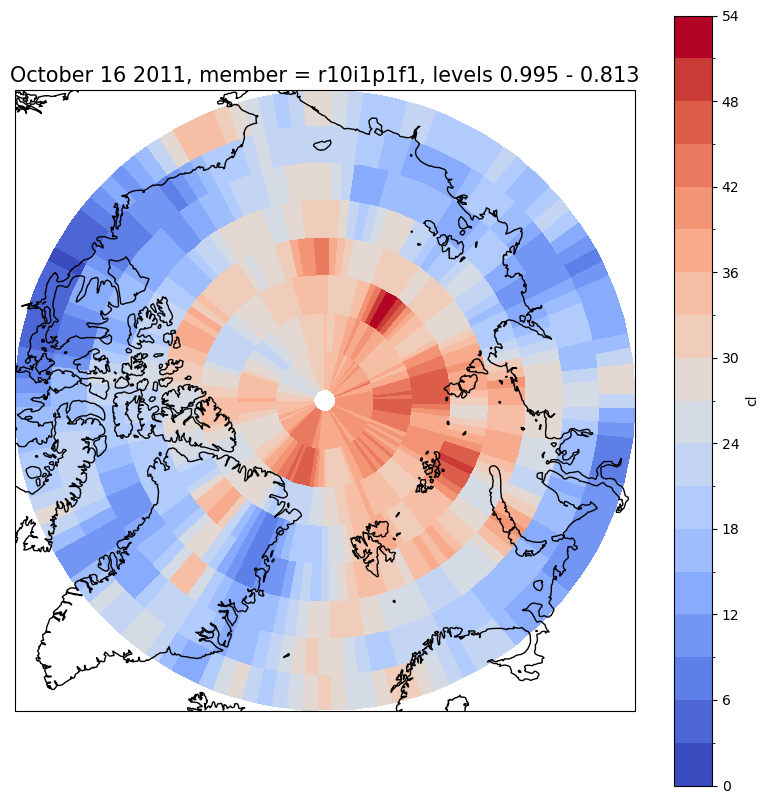

In [48]:
fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# ds_test = ds.sel(time=cftime.DatetimeNoLeap(2012, 4, 1), method='nearest')
ds_test2 = arctic_cl_dset.sel(lev=slice(0.995, 0.8), time = slice('2011-10', '2018'))
ds_test_3 = ds_test2.mean('lev')
ds_test_3.cl.isel(time=10, member_id=0).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', levels=20);
plt.title(f'{ds_test_3.time.values[0].strftime("%B %d %Y")}, member = {ds_test_3.member_id.values[0]}, levels {ds_test2.lev.values[0]} - {ds_test2.lev.values[-1]}', fontsize=15);


In [49]:
## Plot cl % vs. lev (height) for one time and one member_id:
cl = []
lev = []
x=-1
for ii in (arctic_cl_dset.lev.values):
    x=x+1
    lev.append(arctic_cl_dset.lev.values[x].item())
    cl.append(arctic_cl_dset.sel(time = slice('2011-10', '2018')).isel(lev=x, member_id=0, time=0).mean(["lon", "lat"]).cl.values.item())

Text(0.5, 0, 'Cloud fraction %\naveraged from 66.33-90 degrees of latitude')

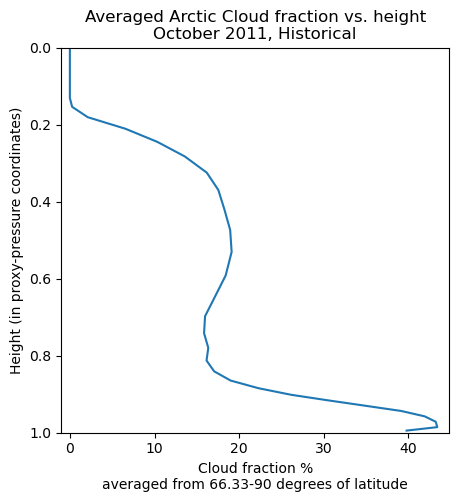

In [50]:
fig,ax = plt.subplots(figsize=(5,5))
plt.plot(cl,lev)
plt.ylim(1,0)
plt.xlim(-1,cl[0]+5)
plt.title("Averaged Arctic Cloud fraction vs. height\nOctober 2011, Historical")
plt.ylabel("Height (in proxy-pressure coordinates)")
plt.xlabel("Cloud fraction %\naveraged from 66.33-90 degrees of latitude")

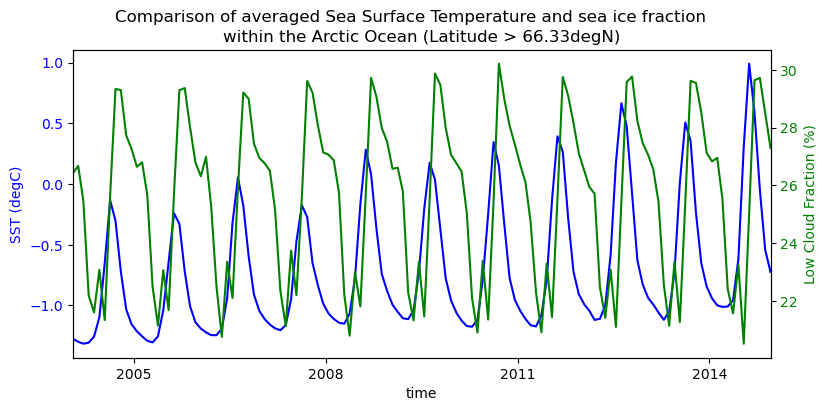

In [51]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()
mean_SST_test_day = SST_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_SST_test_day.plot(ax=ax1,label="Sea Surface Temperature", c="blue")
ax1.set_ylabel("SST (degC)", color = "blue")
ax1.tick_params(axis = "y", labelcolor="Blue")
ax1.set_title("")

cl_lev = arctic_cl_dset.sel(lev=slice(0.995, 0.8)).mean('lev')
mean_cl_test_day = cl_lev.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cl_test_day.mean("member_id").cl.plot(ax=ax2, label="Low Clouds", c="g")
ax2.tick_params(axis='y', labelcolor="g")
ax2.set_ylabel("Low Cloud Fraction (%)", color="g")

plt.xlim(mean_ice_test_day.time[0].item(), mean_ice_test_day.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN)")
plt.suptitle("Comparison of averaged Sea Surface Temperature and sea ice fraction\n");

### Low cloud and Ice

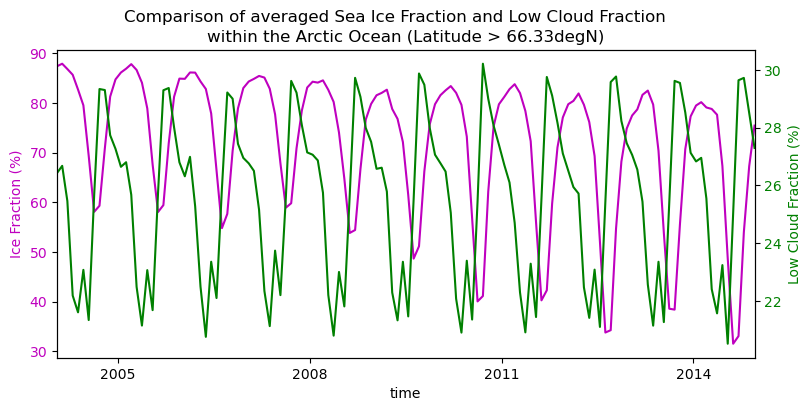

In [52]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()

mean_ice_test_day.plot(ax=ax1, label="Sea Ice Fraction", c="m")
ax1.tick_params(axis='y', labelcolor="m")
ax1.set_ylabel("Ice Fraction (%)", color="m")
ax1.set_title("")

mean_cl_test_day.mean("member_id").cl.plot(ax=ax2, label="Low Clouds", c="g")
ax2.tick_params(axis='y', labelcolor="g")
ax2.set_ylabel("Low Cloud Fraction (%)", color="g")

plt.xlim(mean_ice_test_day.time[0].item(), mean_ice_test_day.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN)")
plt.suptitle("Comparison of averaged Sea Ice Fraction and Low Cloud Fraction\n");

# Best fit line

## sea ice

In [53]:
y = mean_ice_test_day.values
x = mean_ice_test_day.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s = np.array([x_s.seconds for x_s in np.diff(np.array(x))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s = y[0][:-1]

# Find best fit line: 
a, b = np.polyfit(x_s, y_match_s, 1)
print(f'Slope = {a}, Intercept = {b}')

Slope = -3.908929435070093e-06, Intercept = 81.08109321345931


Text(0.5, 1.0, 'Sea ice fraction (%) change of 1.84 % per year')

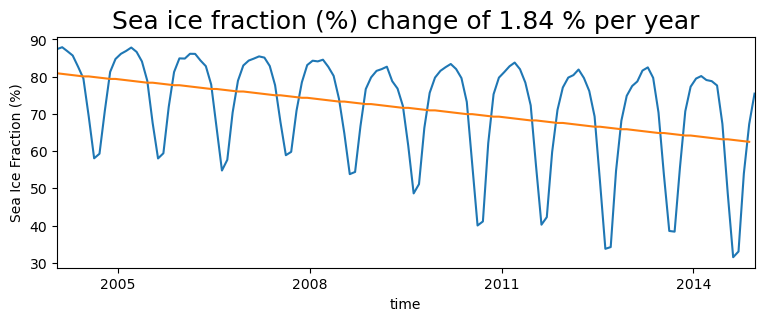

In [54]:
fig,ax = plt.subplots(figsize=(9,3))
mean_ice_test_day = sic_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_ice_test_day.plot()
plt.plot(x[:-1], a*x_s+b)
plt.xlim(mean_ice_test_day.time[0].item(), mean_ice_test_day.time[-1].item())
plt.ylabel("Sea Ice Fraction (%)")

num_yr = (mean_ice_test_day.time[-1].item().year - mean_ice_test_day.time[0].item().year)
# plt.annotate(f'Average Arctic Ice Concentration Change\nof {((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f}% Per Year', xy = (2004,35), c="orange", fontsize=18);
plt.title(f"Sea ice fraction (%) change of {abs((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f} % per year", fontsize=18)

## SST

In [55]:
y = mean_SST_test_day.values
x = mean_SST_test_day.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s = np.array([x_s.seconds for x_s in np.diff(np.array(x))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s = y[0][:-1]

# Find best fit line: 
a, b = np.polyfit(x_s, y_match_s, 1)
print(f'Slope = {a}, Intercept = {b}')

Slope = 1.3804604261828266e-07, Intercept = -1.0367308558044972


Text(0.5, 1.0, 'Sea ice fraction (%) change of 0.07 degC per year')

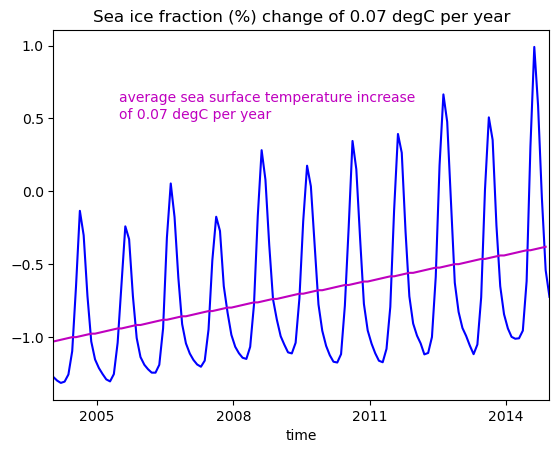

In [56]:
mean_SST_test_day = SST_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_SST_test_day.plot(label="Sea Surface Temperature", c="blue")
plt.plot(x[:-1], a*x_s+b, c="m")
plt.xlim(mean_SST_test_day.time[0].item(), mean_SST_test_day.time[-1].item())

plt.annotate(f'average sea surface temperature increase\nof {abs((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f} degC per year', xy = (2005,0.5), c="m");
plt.title(f"Sea ice fraction (%) change of {abs((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f} degC per year")

## CLT

In [57]:
y_clt = mean_cloud_test_day.mean('member_id').clt.values
x_clt = mean_cloud_test_day.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s_clt = np.array([x_s_clt.seconds for x_s_clt in np.diff(np.array(x_clt))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s_clt = y_clt[:-1]

# Find best fit line: 
a_clt, b_clt = np.polyfit(x_s_clt, y_match_s_clt, 1)
print(f'Slope = {a_clt}, Intercept = {b_clt}')

Slope = [1.39507181e-07], Intercept = [78.88299493]


Text(0.5, 1.0, 'Cloud fraction (%) change of 0.07 % per year')

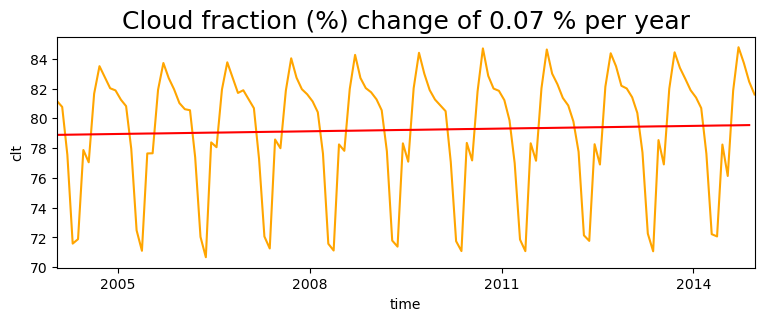

In [58]:
fig,ax = plt.subplots(figsize=(9,3))
mean_cloud_test_day.mean('member_id').clt.plot(label = "cloud fraction", c="orange")
plt.plot(x_clt[:-1], a_clt*x_s_clt+b_clt, c="red")
plt.xlim(mean_cloud_test_day.time[0].item(), mean_cloud_test_day.time[-1].item())

num_yr = (mean_cloud_test_day.time[-1].item().year - mean_cloud_test_day.time[0].item().year)
# plt.annotate(f'average arctic ice concentration change\nof {((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f}% per year', xy = (2020,80), c="red");
plt.title(f"Cloud fraction (%) change of {abs((a_clt*x_s_clt+b_clt)[0] - (a_clt*x_s_clt + b_clt)[-1])/num_yr:0.2f} % per year", fontsize=18)

## Low Clouds

In [59]:
y_cl = mean_cl_test_day.mean('member_id').cl.values
x_cl = mean_cl_test_day.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s_cl = np.array([x_s_cl.seconds for x_s_cl in np.diff(np.array(x_cl))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s_cl = y_cl[:-1]

# Find best fit line: 
a_cl, b_cl = np.polyfit(x_s_cl, y_match_s_cl, 1)
print(f'Slope = {a_cl}, Intercept = {b_cl}')

Slope = [6.7521899e-08], Intercept = [25.38650917]


Text(0.5, 1.0, 'Low Cloud fraction (%) change of 0.03 % per year')

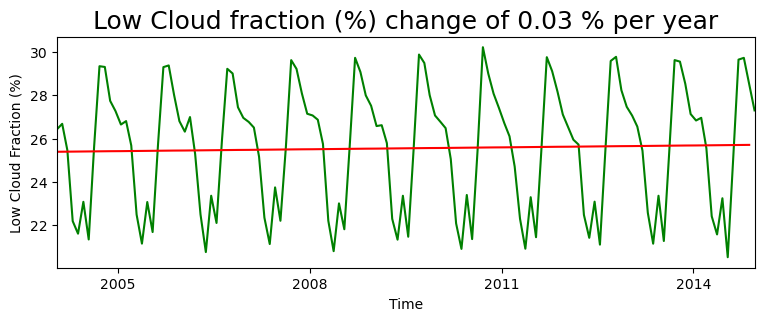

In [60]:
fig,ax = plt.subplots(figsize=(9,3))
mean_cl_test_day.mean('member_id').cl.plot(label = "cloud fraction", c="g")
plt.plot(x_cl[:-1], a_cl*x_s_cl+b_cl, c="red")
plt.xlim(mean_cl_test_day.time[0].item(), mean_cl_test_day.time[-1].item())
plt.ylabel("Low Cloud Fraction (%)")
plt.xlabel("Time")

num_yr = (mean_cl_test_day.time[-1].item().year - mean_cl_test_day.time[0].item().year)
# plt.annotate(f'average arctic ice concentration change\nof {((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f}% per year', xy = (2020,80), c="red");
plt.title(f"Low Cloud fraction (%) change of {abs((a_cl*x_s_cl+b_cl)[0] - (a_cl*x_s_cl + b_cl)[-1])/num_yr:0.2f} % per year", fontsize=18)

# SSP585 

## Cloud (clt)

In [61]:
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"

filename = "arctic_dset_clt_ssp585.nc"
full_path = out_folder / filename
# var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
arctic_clt_ssp585 = xr.open_dataset(full_path)
arctic_clt_ssp585

<xarray.Dataset> Size: 27MB
Dimensions:         (lat: 8, lon: 128, time: 132, dcpp_init_year: 1,
                     member_id: 50, bnds: 2)
Coordinates:
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
  * time            (time) object 1kB 2015-01-16 12:00:00 ... 2025-12-16 12:0...
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
    lat_bnds        (lat, bnds) float64 128B ...
    lon_bnds        (lon, bnds) float64 2kB ...
    time_bnds       (time, bnds) object 2kB ...
Dimensions without coordinates: bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 27MB ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn

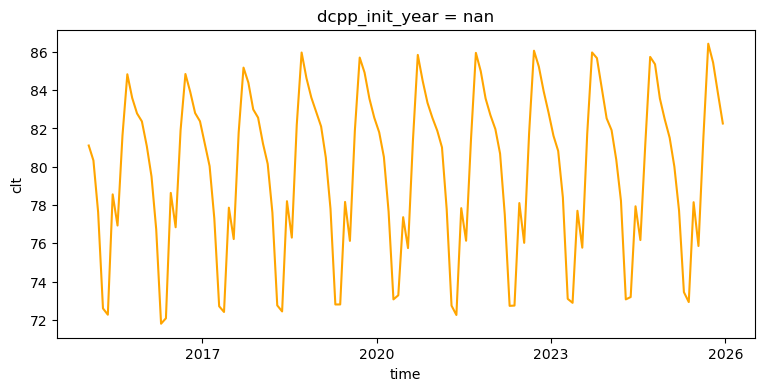

In [62]:
fig, ax = plt.subplots(figsize=(9,4))
mean_cloud_day = arctic_clt_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cloud_day.mean('member_id').clt.plot(label = "cloud fraction", c="orange")

### Linear regression

In [63]:
y_clts = mean_cloud_day.mean('member_id').clt.values
x_clts = mean_cloud_day.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s_clts = np.array([x_s_clts.seconds for x_s_clts in np.diff(np.array(x_clts))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s_clts = y_clts[:-1]

# Find best fit line: 
a_clts, b_clts = np.polyfit(x_s_clts, y_match_s_clts, 1)
print(f'Slope = {a_clts}, Intercept = {b_clts}')

Slope = [2.36966425e-07], Intercept = [79.20147222]


Text(0.5, 1.0, 'Cloud fraction (%) change of 0.11 % per year')

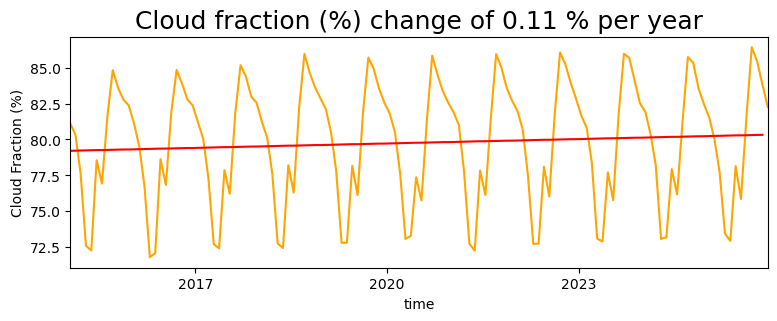

In [64]:
fig,ax = plt.subplots(figsize=(9,3))
mean_cloud_day.mean('member_id').clt.plot(label = "cloud fraction", c="orange")
plt.plot(x_clts[:-1], a_clts*x_s_clts+b_clts, c="red")
plt.xlim(mean_cloud_day.time[0].item(), mean_cloud_day.time[-1].item())
plt.ylabel("Cloud Fraction (%)")

num_yr = (mean_cloud_day.time[-1].item().year - mean_cloud_day.time[0].item().year)
plt.annotate(f'average arctic ice concentration change\nof {((a_clts*x_s_clts+b_clts)[0] - (a_clts*x_s_clts + b_clts)[-1])/num_yr:0.2f}% per year', xy = (2020,80), c="red");
plt.title(f"Cloud fraction (%) change of {abs((a_clts*x_s_clts+b_clts)[0] - (a_clts*x_s_clts + b_clts)[-1])/num_yr:0.2f} % per year", fontsize=18)

## Sea Ice

In [65]:
filename = "arctic_dset_ice_ssp585.nc"
full_path = out_folder / filename
var_key = "ScenarioMIP.CCCma.CanESM5.ssp585.SImon.gn"

arctic_dset_ice_ssp585 = xr.open_dataset(full_path)

In [66]:
arctic_dset_ice_ssp585

<xarray.Dataset> Size: 3GB
Dimensions:             (i: 360, j: 291, time: 132, dcpp_init_year: 1,
                         member_id: 50, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 285 286 287 288 289 290
  * time                (time) object 1kB 2015-01-16 12:00:00 ... 2025-12-16 ...
  * dcpp_init_year      (dcpp_init_year) float64 8B nan
  * member_id           (member_id) <U9 2kB 'r10i1p1f1' ... 'r9i1p2f1'
    latitude            (j, i) float64 838kB ...
    longitude           (j, i) float64 838kB ...
    time_bnds           (time, bnds) object 2kB ...
    type                |S7 7B ...
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    siconc              (member_id, dcpp_init_year, time, j, i) float32 3GB ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        SImon
    intake_esm_attrs:variable_id:     siconc
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.SImon.gn

### Regrid

In [67]:
home_dir = Path.home()
out_folder = home_dir / "repos/e440/A448/data"

filename = "arctic_dset_clt_ssp585.nc"
full_path = out_folder / filename
# var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
obs_arctic_ssp585 = xr.open_dataset(full_path).sel(time="2015-10-16").drop("time")
obs_arctic_ssp585

/var/folders/m4/cscgyrkx4yb7s54p03r47dfw0000gn/T/ipykernel_9884/4276680150.py:7: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  obs_arctic_ssp585 = xr.open_dataset(full_path).sel(time="2015-10-16").drop("time")


<xarray.Dataset> Size: 210kB
Dimensions:         (lat: 8, lon: 128, dcpp_init_year: 1, member_id: 50,
                     time: 1, bnds: 2)
Coordinates:
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
    lat_bnds        (lat, bnds) float64 128B ...
    lon_bnds        (lon, bnds) float64 2kB ...
    time_bnds       (time, bnds) object 16B ...
Dimensions without coordinates: time, bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 205kB ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn

In [68]:
bbox = dict(lon_bnds=[0, 360], lat_bnds=[66.33, 90])
arctic_tgt_ssp585 = subset_bbox(obs_arctic_ssp585, **bbox)
arctic_tgt_ssp585

<xarray.Dataset> Size: 210kB
Dimensions:         (lat: 8, lon: 128, dcpp_init_year: 1, member_id: 50,
                     time: 1, bnds: 2)
Coordinates:
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
  * lon             (lon) float64 1kB 0.0 2.812 5.625 ... 351.6 354.4 357.2
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
    lat_bnds        (lat, bnds) float64 128B 66.99 69.78 69.78 ... 86.58 90.0
    lon_bnds        (lon, bnds) float64 2kB -1.406 1.406 1.406 ... 355.8 358.6
    time_bnds       (time, bnds) object 16B 2015-10-01 00:00:00 2015-11-01 00...
Dimensions without coordinates: time, bnds
Data variables:
    clt             (member_id, dcpp_init_year, time, lat, lon) float32 205kB ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     clt
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn

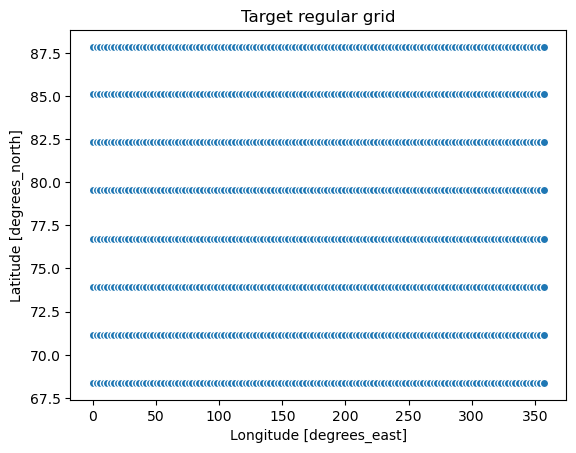

In [69]:
arctic_tgt_ssp585.cf.plot.scatter(x="longitude", y="latitude")
plt.title("Target regular grid");

In [70]:
ds_in_ssp585 = arctic_dset_ice_ssp585.isel(member_id=0)
ds_in_ssp585

<xarray.Dataset> Size: 64MB
Dimensions:             (i: 360, j: 291, time: 132, dcpp_init_year: 1, bnds: 2,
                         vertices: 4)
Coordinates:
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 285 286 287 288 289 290
  * time                (time) object 1kB 2015-01-16 12:00:00 ... 2025-12-16 ...
  * dcpp_init_year      (dcpp_init_year) float64 8B nan
    member_id           <U9 36B 'r10i1p1f1'
    latitude            (j, i) float64 838kB ...
    longitude           (j, i) float64 838kB ...
    time_bnds           (time, bnds) object 2kB ...
    type                |S7 7B ...
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    siconc              (dcpp_init_year, time, j, i) float32 55MB ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        SImon
    intake_esm_attrs:variable_id:     siconc
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.SImon.gn

In [71]:
arctic_bil_ssp585 = xe.Regridder(ds_in_ssp585, arctic_tgt_ssp585, "bilinear")
arctic_bil_ssp585

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_291x360_8x128.nc 
Reuse pre-computed weights? False 
Input grid shape:           (291, 360) 
Output grid shape:          (8, 128) 
Periodic in longitude?      False

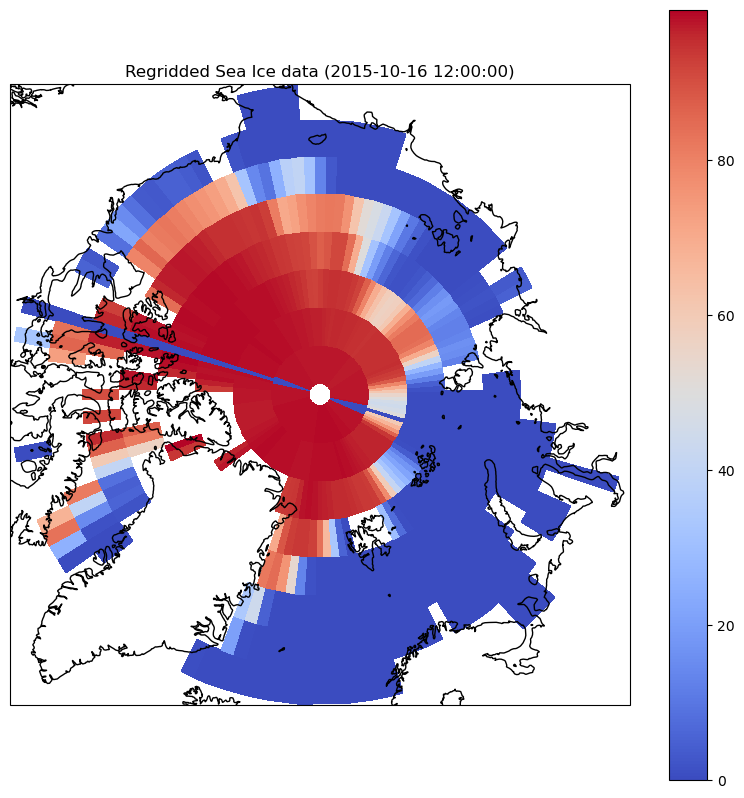

In [72]:
# Apply the regridding weights to the input sea ice concentration data
sic_arctic_ssp585 = arctic_bil_ssp585(ds_in_ssp585.siconc)

fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
sic_arctic_ssp585.isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title(f"Regridded Sea Ice data ({sic_arctic_ssp585.time[9].values})");

### Plot

#### Sea ice and CLT

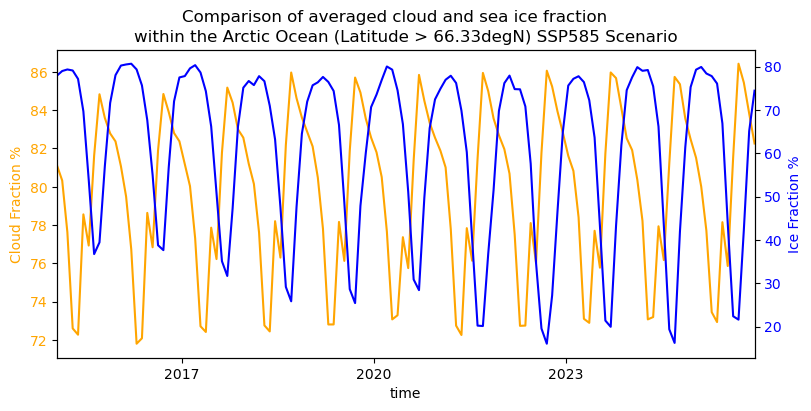

In [73]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()

mean_clt_day_ssp585 = arctic_clt_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_clt_day_ssp585.mean('member_id').clt.plot(ax=ax1, label = "Cloud Fraction", c="orange")
ax1.set_ylabel("Cloud Fraction %", color = "orange")
ax1.tick_params(axis = "y", labelcolor="orange")
ax1.set_title("")

mean_ice_day_ssp585 = sic_arctic_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_ice_day_ssp585.plot(label="Sea Ice", c="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylabel("Ice Fraction %", color="blue")

plt.xlim(mean_ice_day_ssp585.time[0].item(), mean_ice_day_ssp585.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN) SSP585 Scenario")
plt.suptitle("Comparison of averaged cloud and sea ice fraction\n");

## SST

### Regrid

In [74]:
filename = "arctic_dset_SST_ssp585.nc"
full_path = out_folder / filename
# var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
arctic_dset_SST_ssp585 = xr.open_dataset(full_path)
arctic_dset_SST_ssp585

<xarray.Dataset> Size: 3GB
Dimensions:             (i: 360, j: 291, time: 132, dcpp_init_year: 1,
                         member_id: 50, bnds: 2, vertices: 4)
Coordinates:
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 285 286 287 288 289 290
  * time                (time) object 1kB 2015-01-16 12:00:00 ... 2025-12-16 ...
  * dcpp_init_year      (dcpp_init_year) float64 8B nan
  * member_id           (member_id) <U9 2kB 'r10i1p1f1' ... 'r9i1p2f1'
    latitude            (member_id, j, i) float64 42MB ...
    longitude           (member_id, j, i) float64 42MB ...
    time_bnds           (time, bnds) object 2kB ...
    vertices_latitude   (member_id, j, i, vertices) float64 168MB ...
    vertices_longitude  (member_id, j, i, vertices) float64 168MB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (member_id, dcpp_init_year, time, j, i) float32 3GB ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Omon.gn

In [75]:
ds_in_ssp585 = arctic_dset_SST_ssp585.isel(member_id=0)
ds_in_ssp585

<xarray.Dataset> Size: 64MB
Dimensions:             (i: 360, j: 291, time: 132, dcpp_init_year: 1, bnds: 2,
                         vertices: 4)
Coordinates:
  * i                   (i) int32 1kB 0 1 2 3 4 5 6 ... 354 355 356 357 358 359
  * j                   (j) int32 1kB 0 1 2 3 4 5 6 ... 285 286 287 288 289 290
  * time                (time) object 1kB 2015-01-16 12:00:00 ... 2025-12-16 ...
  * dcpp_init_year      (dcpp_init_year) float64 8B nan
    member_id           <U9 36B 'r10i1p1f1'
    latitude            (j, i) float64 838kB ...
    longitude           (j, i) float64 838kB ...
    time_bnds           (time, bnds) object 2kB ...
    vertices_latitude   (j, i, vertices) float64 3MB ...
    vertices_longitude  (j, i, vertices) float64 3MB ...
Dimensions without coordinates: bnds, vertices
Data variables:
    tos                 (dcpp_init_year, time, j, i) float32 55MB ...
Attributes: (12/49)
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    branch_time_in_child:             60225.0
    ...                               ...
    intake_esm_attrs:table_id:        Omon
    intake_esm_attrs:variable_id:     tos
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Omon.gn

In [76]:
arctic_bil_ssp585 = xe.Regridder(ds_in_ssp585, arctic_tgt_ssp585, "bilinear")
arctic_bil_ssp585

xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_291x360_8x128.nc 
Reuse pre-computed weights? False 
Input grid shape:           (291, 360) 
Output grid shape:          (8, 128) 
Periodic in longitude?      False

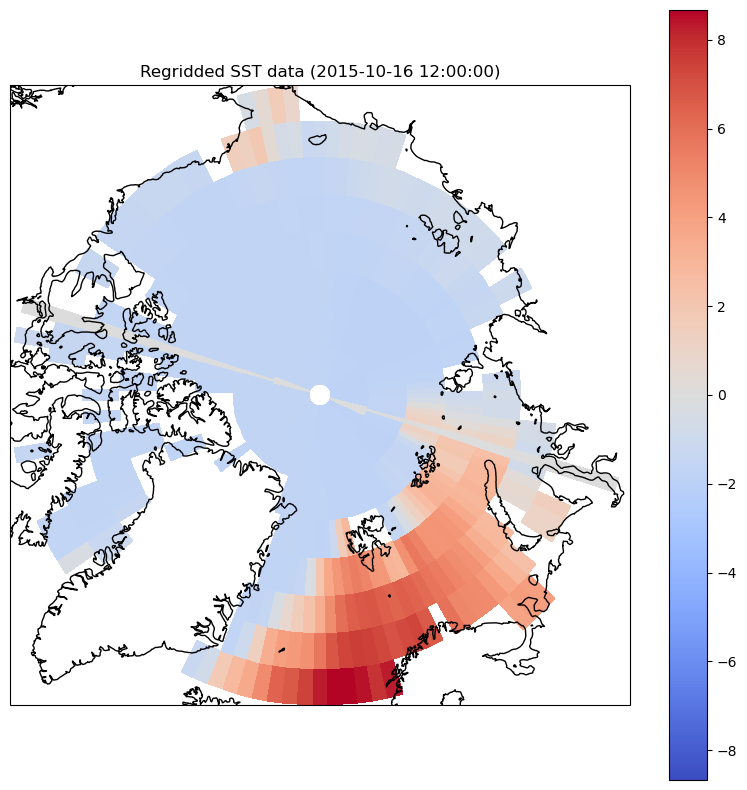

In [77]:
# Apply the regridding weights to the input sea ice concentration data
SST_arctic_ssp585 = arctic_bil_ssp585(ds_in_ssp585.tos)

fig = plt.figure(1, figsize=[10,10])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
SST_arctic_ssp585.isel(time=10).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title(f"Regridded SST data ({SST_arctic_ssp585.time[9].values})");

### Plot

#### CLT and SST

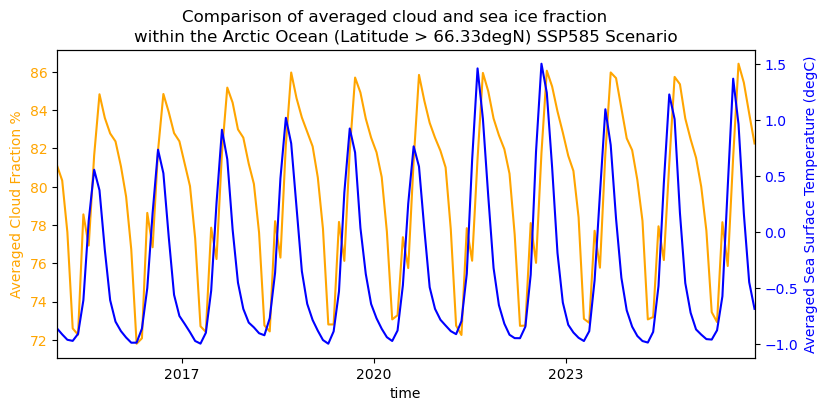

In [78]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()

mean_cloud_day_ssp585 = arctic_clt_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cloud_day_ssp585.mean('member_id').clt.plot(ax=ax1, label = "cloud fraction", c="orange")
ax1.set_ylabel("Averaged Cloud Fraction %", color = "orange")
ax1.tick_params(axis = "y", labelcolor="orange")
ax1.set_title("")

mean_SST_day_ssp585 = SST_arctic_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_SST_day_ssp585.plot(label="Sea Surface Temperature", c="blue")
ax2.tick_params(axis='y', labelcolor="blue")
ax2.set_ylabel("Averaged Sea Surface Temperature (degC)", color="blue")

plt.xlim(mean_SST_day_ssp585.time[0].item(), mean_SST_day_ssp585.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN) SSP585 Scenario")
plt.suptitle("Comparison of averaged cloud and sea ice fraction\n");

#### Sea Ice and SST

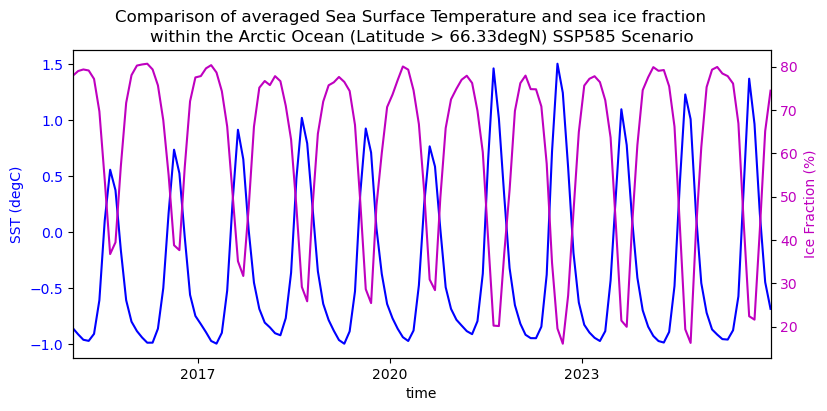

In [79]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()
# mean_SST_test_day = SST_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_SST_day_ssp585.plot(ax=ax1,label="Sea Surface Temperature", c="blue")
ax1.set_ylabel("SST (degC)", color = "blue")
ax1.tick_params(axis = "y", labelcolor="Blue")
ax1.set_title("")

# mean_ice_test_day = sic_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_ice_day_ssp585.plot(ax=ax2, label="Sea Ice Fraction", c="m")
ax2.tick_params(axis='y', labelcolor="m")
ax2.set_ylabel("Ice Fraction (%)", color="m")

plt.xlim(mean_SST_day_ssp585.time[0].item(), mean_SST_day_ssp585.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN) SSP585 Scenario")
plt.suptitle("Comparison of averaged Sea Surface Temperature and sea ice fraction\n");

#### Low cloud and SST

In [80]:
filename = "arctic_dset_cl_ssp585.nc"
full_path = out_folder / filename
# var_key = "CMIP.CCCma.CanESM5.historical.SImon.gn"
arctic_cl_dset_ssp585 = xr.open_dataset(full_path)
arctic_cl_dset_ssp585

<xarray.Dataset> Size: 1GB
Dimensions:         (lev: 49, bnds: 2, member_id: 50, dcpp_init_year: 1,
                     time: 132, lat: 8, lon: 128)
Coordinates: (12/15)
    ap              (lev) float64 392B ...
    ap_bnds         (lev, bnds) float64 784B ...
    b               (lev) float64 392B ...
    b_bnds          (lev, bnds) float64 784B ...
  * lat             (lat) float64 64B 68.37 71.16 73.95 ... 82.31 85.1 87.86
    lat_bnds        (lat, bnds) float64 128B ...
    ...              ...
    lon_bnds        (lon, bnds) float64 2kB ...
    ps              (member_id, time, lat, lon) float32 27MB ...
  * time            (time) object 1kB 2015-01-16 12:00:00 ... 2025-12-16 12:0...
    time_bnds       (time, bnds) object 2kB ...
  * member_id       (member_id) <U9 2kB 'r10i1p1f1' 'r10i1p2f1' ... 'r9i1p2f1'
  * dcpp_init_year  (dcpp_init_year) float64 8B nan
Dimensions without coordinates: bnds
Data variables:
    cl              (member_id, dcpp_init_year, time, lev, lat, lon) float32 1GB ...
Attributes: (12/54)
    CCCma_pycmor_hash:                e9be30792f709197b37c5ec60e475d684fab8390
    Conventions:                      CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:        2015:01:01:00
    YMDH_branch_time_in_parent:       2015:01:01:00
    activity_id:                      ScenarioMIP
    branch_method:                    Spin-up documentation
    ...                               ...
    intake_esm_attrs:table_id:        Amon
    intake_esm_attrs:variable_id:     cl
    intake_esm_attrs:grid_label:      gn
    intake_esm_attrs:version:         20190429
    intake_esm_attrs:_data_format_:   zarr
    intake_esm_dataset_key:           ScenarioMIP.CCCma.CanESM5.ssp585.Amon.gn

Text(0.5, 0, 'Cloud fraction %\naveraged from 66.33-90 degrees of latitude')

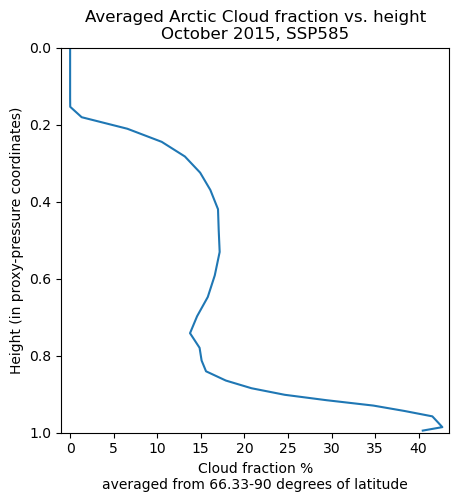

In [81]:
cl_ssp585 = []
lev_ssp585 = []
x=-1
for ii in (arctic_cl_dset_ssp585.lev.values):
    x=x+1
    lev_ssp585.append(arctic_cl_dset_ssp585.lev.values[x].item())
    cl_ssp585.append(arctic_cl_dset_ssp585.sel(time = slice('2015-10', '2018')).isel(lev=x, member_id=0, time=0).mean(["lon", "lat"]).cl.values.item())

fig,ax = plt.subplots(figsize=(5,5))
plt.plot(cl_ssp585,lev_ssp585)
plt.ylim(1,0)
plt.xlim(-1,cl_ssp585[0]+3)
plt.title("Averaged Arctic Cloud fraction vs. height\nOctober 2015, SSP585")
plt.ylabel("Height (in proxy-pressure coordinates)")
plt.xlabel("Cloud fraction %\naveraged from 66.33-90 degrees of latitude")
# plt.title(f'{arctic_cl_dset_ssp585.sel(time = slice('2015-10', '2018')).time.values[0].strftime("%B %Y")}, member = {arctic_cl_dset_ssp585.member_id.values[0]}', fontsize=18);;


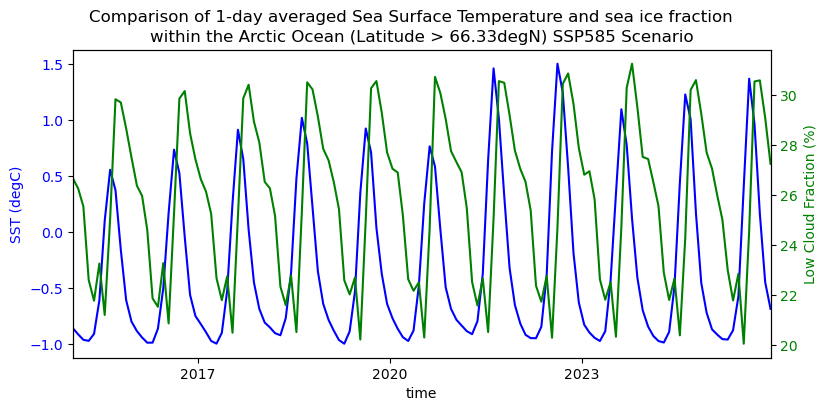

In [82]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()
# mean_SST_test_day = SST_arctic.groupby('time').mean('time').mean(['lon', 'lat'])
mean_SST_day_ssp585.plot(ax=ax1,label="Sea Surface Temperature", c="blue")
ax1.set_ylabel("SST (degC)", color = "blue")
ax1.tick_params(axis = "y", labelcolor="Blue")
ax1.set_title("")

cl_lev_ssp585 = arctic_cl_dset_ssp585.sel(lev=slice(0.995, 0.8)).mean('lev')
mean_cl_day_ssp585 = cl_lev_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cl_day_ssp585.mean("member_id").cl.plot(ax=ax2, label="Low Clouds", c="g")
ax2.tick_params(axis='y', labelcolor="g")
ax2.set_ylabel("Low Cloud Fraction (%)", color="g")

plt.xlim(mean_SST_day_ssp585.time[0].item(), mean_SST_day_ssp585.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN) SSP585 Scenario")
plt.suptitle("Comparison of 1-day averaged Sea Surface Temperature and sea ice fraction\n");

#### Low Cloud and Ice

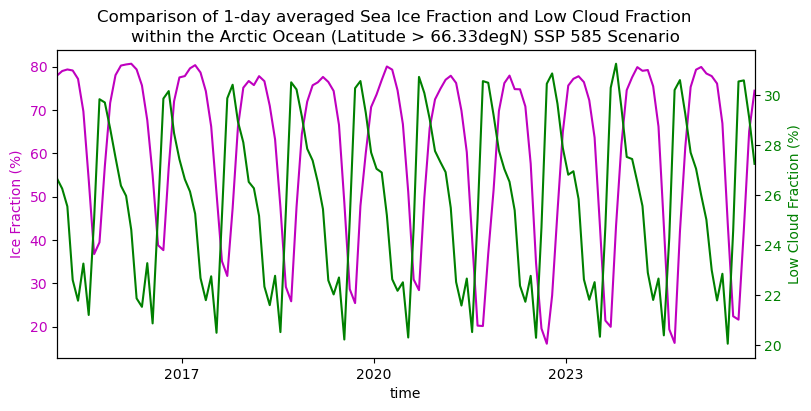

In [83]:
fig, ax1 = plt.subplots(figsize=(9,4))
ax2 = ax1.twinx()

mean_ice_day_ssp585.plot(ax=ax1, label="Sea Ice Fraction", c="m")
ax1.tick_params(axis='y', labelcolor="m")
ax1.set_ylabel("Ice Fraction (%)", color="m")
ax1.set_title("")

mean_cl_day_ssp585.mean("member_id").cl.plot(ax=ax2, label="Low Clouds", c="g")
ax2.tick_params(axis='y', labelcolor="g")
ax2.set_ylabel("Low Cloud Fraction (%)", color="g")

plt.xlim(mean_cl_day_ssp585.time[0].item(), mean_cl_day_ssp585.time[-1].item())
plt.title("within the Arctic Ocean (Latitude > 66.33degN) SSP 585 Scenario")
plt.suptitle("Comparison of 1-day averaged Sea Ice Fraction and Low Cloud Fraction\n");

## Linear regressions

### Sea ice

In [84]:
y = mean_ice_day_ssp585.values
x = mean_ice_day_ssp585.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s = np.array([x_s.seconds for x_s in np.diff(np.array(x))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s = y[0][:-1]

# Find best fit line: 
a, b = np.polyfit(x_s, y_match_s, 1)
print(f'Slope = {a*60*60*24}, Intercept = {b}')

Slope = -0.2379621847277295, Intercept = 67.37850496349184


Text(0.5, 1.0, 'Sea ice fraction (%) change of 1.30 % per year (SSP585 Scenario)')

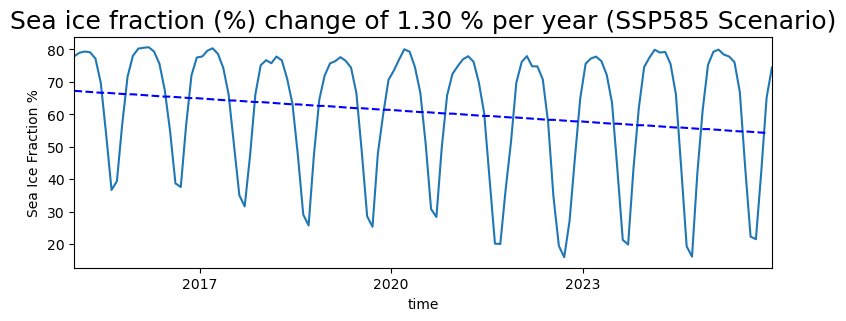

In [85]:
fig,ax = plt.subplots(figsize=(9,3))
mean_ice_day_ssp585.plot()
plt.plot(x[:-1], a*x_s+b, c="blue", linestyle="--")
plt.xlim(mean_ice_day_ssp585.time[0].item(), mean_ice_day_ssp585.time[-1].item())
plt.ylabel("Sea Ice Fraction %")

num_yr = (mean_ice_day_ssp585.time[-1].item().year - mean_ice_day_ssp585.time[0].item().year)
# plt.annotate(f'average arctic ice concentration change\nof {((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f}% per year', xy = (2015,35), c="orange");
plt.title(f"Sea ice fraction (%) change of {abs((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f} % per year (SSP585 Scenario)", fontsize=18)


### SST

In [86]:
y = mean_SST_day_ssp585.values
x = mean_SST_day_ssp585.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s = np.array([x_s.seconds for x_s in np.diff(np.array(x))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s = y[0][:-1]

# Find best fit line: 
a, b = np.polyfit(x_s, y_match_s, 1)
print(f'Slope = {a*60*60*24}, Intercept = {b}')

Slope = 0.0061691929098715275, Intercept = -0.48139574584503964


Text(0.5, 1.0, 'Average Sea Surface Temperature change of 0.03 degC\nper year (SSP585 Scenario)')

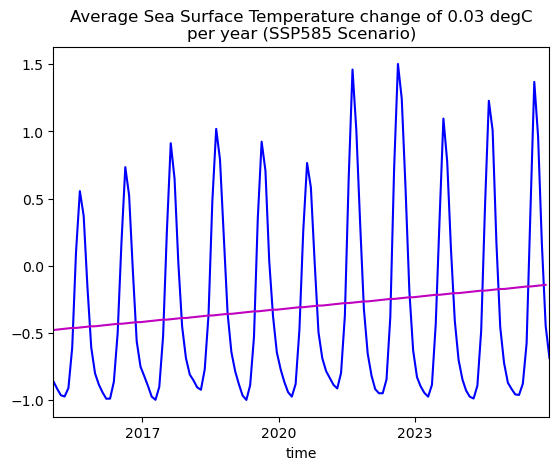

In [87]:
mean_SST_day_ssp585.plot(label="Sea Surface Temperature", c="blue")
plt.plot(x[:-1], a*x_s+b, c="m")
plt.xlim(mean_SST_day_ssp585.time[0].item(), mean_SST_day_ssp585.time[-1].item())

# plt.annotate(f'average sea surface temperature increase\nof {((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f}% per year', xy = (2005,0.5), c="m");
plt.title(f"Average Sea Surface Temperature change of {abs((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f} degC\nper year (SSP585 Scenario)")

### Low Clouds

In [88]:
y_cls = mean_cl_day_ssp585.mean('member_id').cl.values
x_cls = mean_cl_day_ssp585.time.values

# need to convert to seconds to work with np.polyfit. link: 
# (https://stackoverflow.com/questions/ 59108577/how-can-i-get-a-curve-of-best-fit-using-polyfit
# -when-the-x-values-are-datetimes)
x_s_cls = np.array([x_s_cls.seconds for x_s_cls in np.diff(np.array(x_cls))]).cumsum()

# get rid of last y to match length of x_s:
y_match_s_cls = y_cls[:-1]

# Find best fit line: 
a_cls, b_cls = np.polyfit(x_s_cls, y_match_s_cls, 1)
print(f'Slope = {a_cls}, Intercept = {b_cls}')

Slope = [1.15303521e-07], Intercept = [25.44141206]


Text(0.5, 1.0, 'Low Cloud fraction (%) change of 0.05 % per year (SSP585 Scenario)')

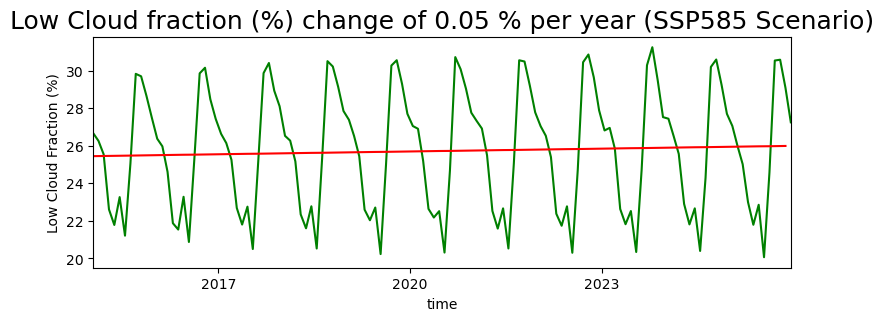

In [89]:
fig,ax = plt.subplots(figsize=(9,3))
mean_cl_day_ssp585.mean('member_id').cl.plot(label = "cloud fraction", c="g")
plt.plot(x_cls[:-1], a_cls*x_s_cls+b_cls, c="red")
plt.xlim(mean_cl_day_ssp585.time[0].item(), mean_cl_day_ssp585.time[-1].item())
plt.ylabel("Low Cloud Fraction (%)")

num_yr = (mean_cl_day_ssp585.time[-1].item().year - mean_cl_day_ssp585.time[0].item().year)
# plt.annotate(f'average arctic ice concentration change\nof {((a*x_s+b)[0] - (a*x_s + b)[-1])/num_yr:0.2f}% per year', xy = (2020,80), c="red");
plt.title(f"Low Cloud fraction (%) change of {abs((a_cls*x_s_cls+b_cls)[0] - (a_cls*x_s_cls + b_cls)[-1])/num_yr:0.2f} % per year (SSP585 Scenario)", fontsize=18)

# Sea Iceless grid - Historical

## Select data for sea iceless grid cells

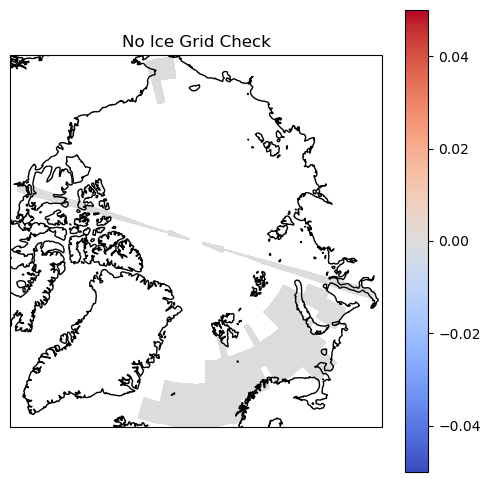

In [90]:
# Select sea ice data for grid cells with no ice:
obs_no_ice = sic_arctic.where(sic_arctic.values == 0)

fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# Plot the results
obs_no_ice.isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("No Ice Grid Check");

In [91]:
### Apply zero ice mask to CLT, SST, and CL
zero_ice_mask = sic_arctic.values == 0
cloud_no_ice = arctic_grid_clt.where(zero_ice_mask)
SST_no_ice = SST_arctic.where(zero_ice_mask)
cl_no_ice = arctic_cl_dset.sel(lev=slice(0.995, 0.8)).mean('lev').where(zero_ice_mask)

In [92]:
### Check other data to make sure it matches the grid seen above for no ice:

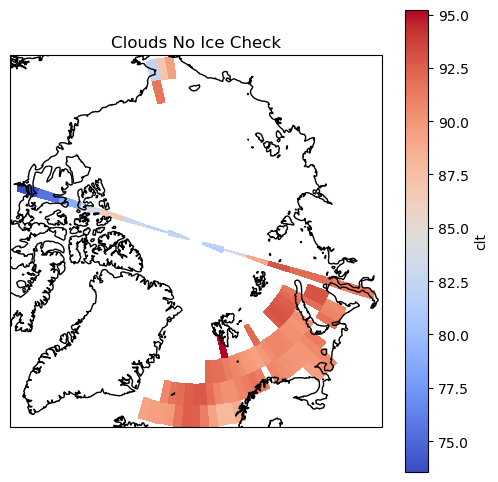

In [93]:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
cloud_no_ice.clt.mean("member_id").isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("Clouds No Ice Check");

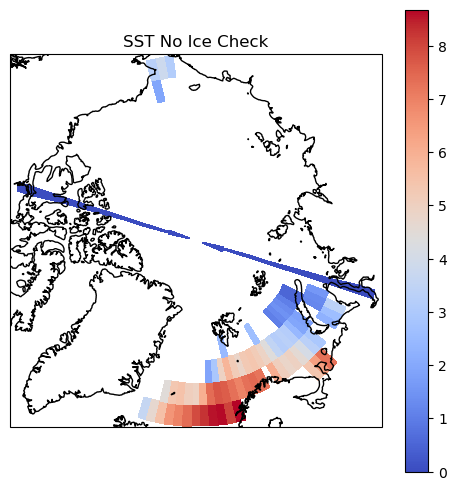

In [94]:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
SST_no_ice.isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("SST No Ice Check");

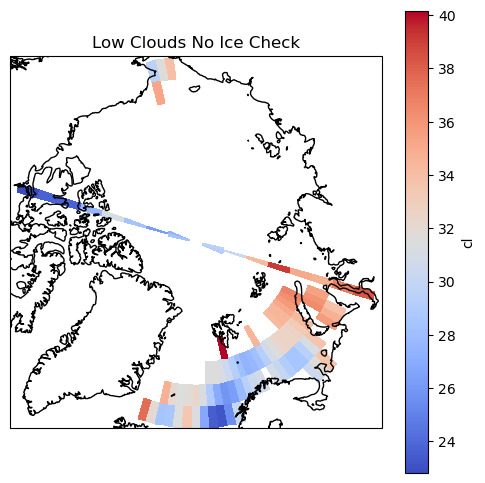

In [95]:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
cl_no_ice.cl.mean("member_id").isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("Low Clouds No Ice Check");

most Xarray functions skip nans in computations by default (aka skipna is default to True for mean(), sum(), etc.)

## Plots

### Clouds with/without ice

In [96]:
mean_cloud_iceless_day = cloud_no_ice.groupby('time').mean('time').mean(['lon', 'lat'])
y_clti = mean_cloud_iceless_day.mean('member_id').clt.values
x_clti = mean_cloud_iceless_day.time.values
# need to convert to seconds to work with np.polyfit:
x_s_clti = np.array([x_s_clti.seconds for x_s_clti in np.diff(np.array(x_clti))]).cumsum()
# get rid of last y to match length of x_s:
y_match_s_clti = y_clti[:-1]
# Find best fit line: 
a_clti, b_clti = np.polyfit(x_s_clti, y_match_s_clti, 1)
print(f'Slope = {a_clti}, Intercept = {b_clti}')

Slope = [5.0960919e-07], Intercept = [83.25963126]


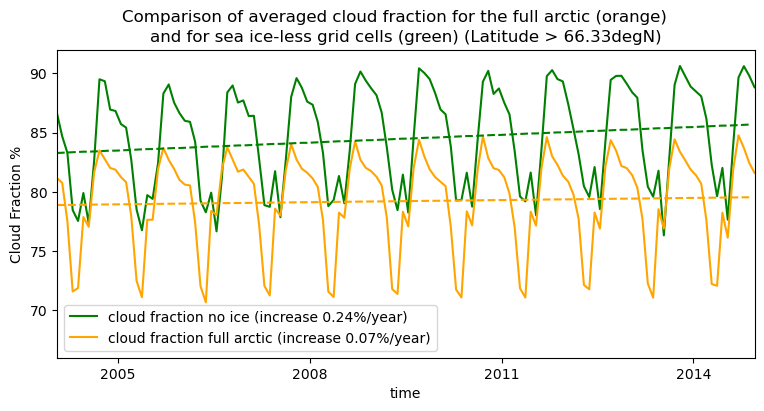

In [97]:
## Cloud no ice vs. cloud full arctic
fig, ax1 = plt.subplots(figsize=(9,4))

# mean_cloud_iceless_day = cloud_no_ice.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cloud_iceless_day.mean('member_id').clt.plot(label = f"cloud fraction no ice (increase {abs((a_clti*x_s_clti+b_clti)[0] - (a_clti*x_s_clti + b_clti)[-1])/num_yr:0.2f}%/year)", c="green")
mean_cloud_test_day.mean('member_id').clt.plot(label = f"cloud fraction full arctic (increase {abs((a_clt*x_s_clt+b_clt)[0] - (a_clt*x_s_clt + b_clt)[-1])/num_yr:0.2f}%/year)", c="orange")
ax1.set_ylabel("Cloud Fraction %")
ax1.set_title("")
plt.legend(loc=3)
ax1.set_ylim(66,92)

plt.xlim(mean_cloud_iceless_day.time[0].item(), mean_cloud_iceless_day.time[-1].item())
plt.title("and for sea ice-less grid cells (green) (Latitude > 66.33degN)")
plt.suptitle("Comparison of averaged cloud fraction for the full arctic (orange)\n")
plt.plot(x_clt[:-1], a_clt*x_s_clt+b_clt, c="orange", linestyle="--")
plt.plot(x_clt[:-1], a_clti*x_s_clti+b_clti, c="green", linestyle="--");

### Low clouds with/without ice

In [98]:
## linear regression for historical iceless cl:
mean_cl_iceless_day = cl_no_ice.groupby('time').mean('time').mean(['lon', 'lat'])
y_cli = mean_cl_iceless_day.mean('member_id').cl.values
x_cli = mean_cl_iceless_day.time.values
# need to convert to seconds to work with np.polyfit:
x_s_cli = np.array([x_s_cli.seconds for x_s_cli in np.diff(np.array(x_cli))]).cumsum()
# get rid of last y to match length of x_s:
y_match_s_cli = y_cli[:-1]
# Find best fit line: 
a_cli, b_cli = np.polyfit(x_s_cli, y_match_s_cli, 1)
print(f'Slope = {a_cli}, Intercept = {b_cli}')

Slope = [3.92666364e-07], Intercept = [25.78454085]


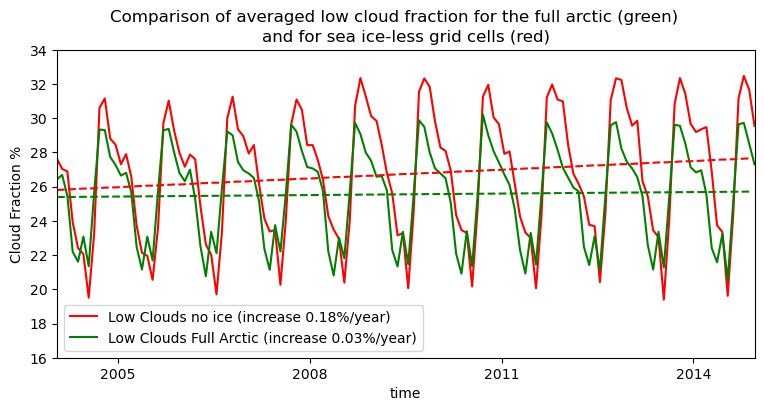

In [99]:
## Cloud no ice vs. cloud full arctic
fig, ax1 = plt.subplots(figsize=(9,4))

# mean_cl_iceless_day = cl_no_ice.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cl_iceless_day.mean('member_id').cl.plot(label = f"Low Clouds no ice (increase {abs((a_cli*x_s_cli+b_cli)[0] - (a_cli*x_s_cli + b_cli)[-1])/num_yr:0.2f}%/year)", c="red")
mean_cl_test_day.mean("member_id").cl.plot(label=f"Low Clouds Full Arctic (increase {abs((a_cl*x_s_cl+b_cl)[0] - (a_cl*x_s_cl + b_cl)[-1])/num_yr:0.2f}%/year)", c="g")
ax1.set_ylabel("Cloud Fraction %")
ax1.set_title("")
plt.legend(loc=3)
ax1.set_ylim(16,34)

plt.xlim(mean_cloud_iceless_day.time[0].item(), mean_cloud_iceless_day.time[-1].item())
plt.title("and for sea ice-less grid cells (red)")
plt.suptitle("Comparison of averaged low cloud fraction for the full arctic (green)\n")
plt.plot(x_cl[:-1], a_cl*x_s_cl+b_cl, c="green", linestyle="--")
plt.plot(x_cl[:-1], a_cli*x_s_cli+b_cli, c="red", linestyle="--");

# Sea Iceless Grid - SSP585

### Select Data for sea iceless grid cells

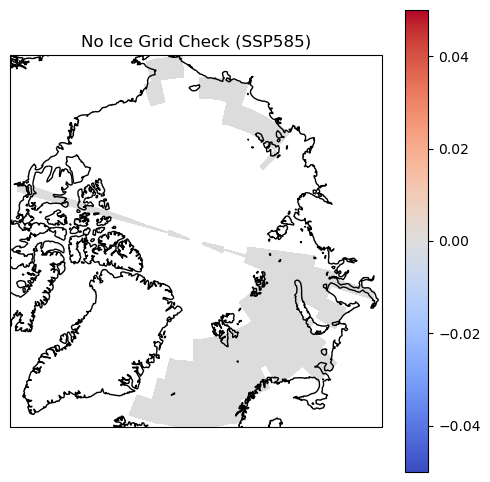

In [100]:
sic_arctic_ssp585
obs_no_ice_ssp585 = sic_arctic_ssp585.where(sic_arctic_ssp585.values == 0)

fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# Plot the results
obs_no_ice_ssp585.isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("No Ice Grid Check (SSP585)");

In [101]:
### Apply zero ice mask to CLT, SST, and CL
zero_ice_mask_ssp585 = sic_arctic_ssp585.values == 0
cloud_no_ice_ssp585 = arctic_clt_ssp585.where(zero_ice_mask_ssp585)
SST_no_ice_ssp585 = SST_arctic_ssp585.where(zero_ice_mask_ssp585)
cl_no_ice_ssp585 = arctic_cl_dset_ssp585.sel(lev=slice(0.995, 0.8)).mean('lev').where(zero_ice_mask_ssp585)

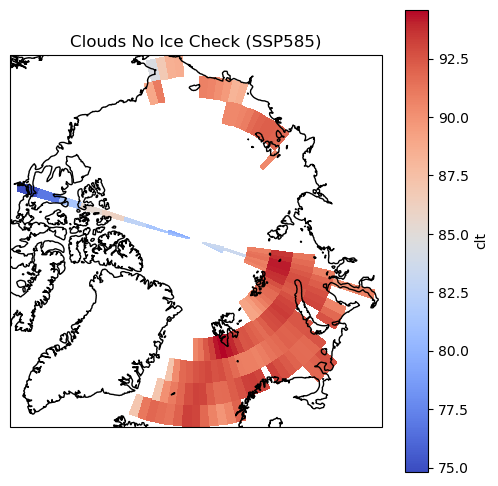

In [102]:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
cloud_no_ice_ssp585.clt.mean("member_id").isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("Clouds No Ice Check (SSP585)");

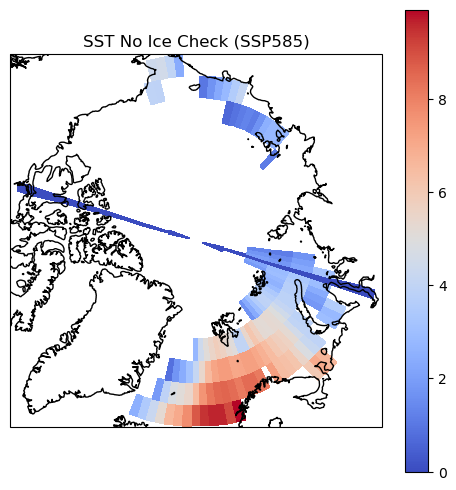

In [103]:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
SST_no_ice_ssp585.isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("SST No Ice Check (SSP585)");

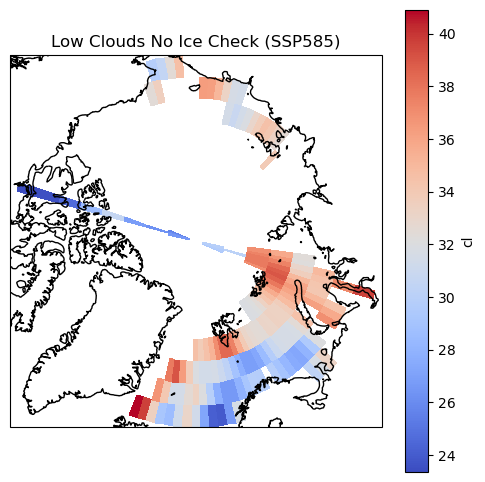

In [104]:
fig = plt.figure(1, figsize=[6,6])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()
# Plot the results
cl_no_ice_ssp585.cl.mean("member_id").isel(time=9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.title("Low Clouds No Ice Check (SSP585)");

### Plots

#### Clouds with/without ice

In [105]:
## linear regression for iceless clt
mean_cloud_iceless_day_ssp585 = cloud_no_ice_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
y_cltsi = mean_cloud_iceless_day_ssp585.mean('member_id').clt.values
x_cltsi = mean_cloud_iceless_day_ssp585.time.values
# convert to seconds
x_s_cltsi = np.array([x_s_cltsi.seconds for x_s_cltsi in np.diff(np.array(x_cltsi))]).cumsum()
# get rid of last y to match length of x_s:
y_match_s_cltsi = y_cltsi[:-1]
# Find best fit line: 
a_cltsi, b_cltsi = np.polyfit(x_s_cltsi, y_match_s_cltsi, 1)
print(f'Slope = {a_cltsi}, Intercept = {b_cltsi}')

Slope = [6.00601751e-08], Intercept = [85.49787699]


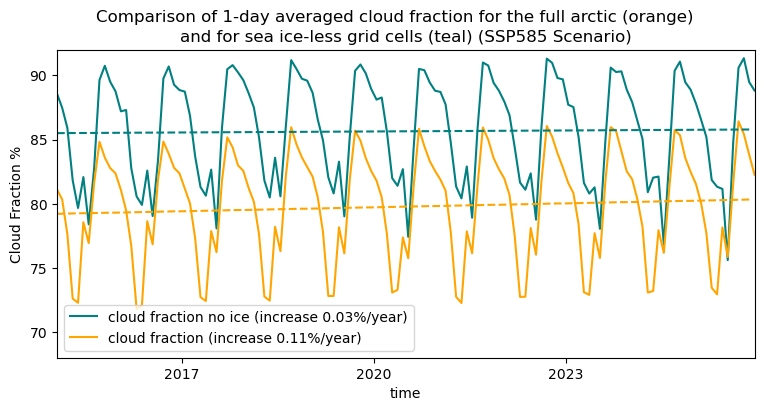

In [106]:
## Cloud no ice vs. cloud full arctic
fig, ax1 = plt.subplots(figsize=(9,4))

# mean_cloud_iceless_day_ssp585 = cloud_no_ice_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cloud_iceless_day_ssp585.mean('member_id').clt.plot(label = f"cloud fraction no ice (increase {abs((a_cltsi*x_s_cltsi+b_cltsi)[0] - (a_cltsi*x_s_cltsi + b_cltsi)[-1])/num_yr:0.2f}%/year)", c="teal")
mean_cloud_day_ssp585.mean('member_id').clt.plot(label = f"cloud fraction (increase {abs((a_clts*x_s_clts+b_clts)[0] - (a_clts*x_s_clts + b_clts)[-1])/num_yr:0.2f}%/year)", c="orange")
ax1.set_ylabel("Cloud Fraction %")
ax1.set_title("")
plt.legend(loc=3)
ax1.set_ylim(68,92)

plt.xlim(mean_cloud_iceless_day_ssp585.time[0].item(), mean_cloud_iceless_day_ssp585.time[-1].item())
plt.title("and for sea ice-less grid cells (teal) (SSP585 Scenario)")
plt.suptitle("Comparison of 1-day averaged cloud fraction for the full arctic (orange)\n")

plt.plot(x_clts[:-1], a_clts*x_s_clts+b_clts, c="orange", linestyle="--")
plt.plot(x_cltsi[:-1], a_cltsi*x_s_cltsi+b_cltsi, c="teal", linestyle="--");

#### Low Clouds with/without ice

In [107]:
## linear regression for iceless cl
mean_cl_iceless_day_ssp585 = cl_no_ice_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
y_clsi = mean_cl_iceless_day_ssp585.mean('member_id').cl.values
x_clsi = mean_cl_iceless_day_ssp585.time.values
# convert to seconds
x_s_clsi = np.array([x_s_clsi.seconds for x_s_clsi in np.diff(np.array(x_clsi))]).cumsum()
# get rid of last y to match length of x_s:
y_match_s_clsi = y_clsi[:-1]
# Find best fit line: 
a_clsi, b_clsi = np.polyfit(x_s_clsi, y_match_s_clsi, 1)
print(f'Slope = {a_clsi}, Intercept = {b_clsi}')

Slope = [-1.46757162e-07], Intercept = [27.40651365]


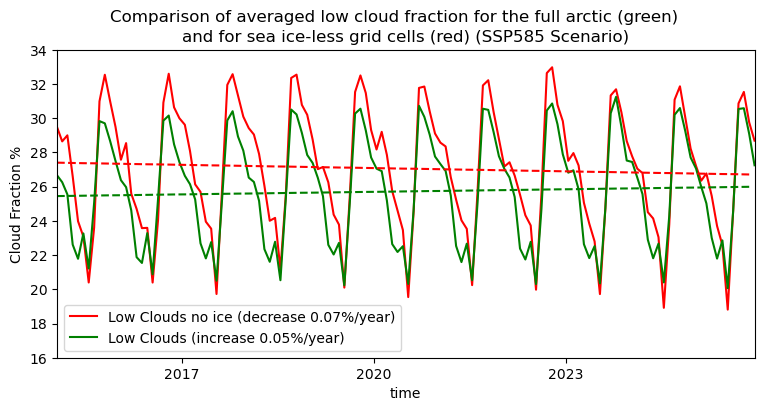

In [108]:
## Cloud no ice vs. cloud full arctic
fig, ax1 = plt.subplots(figsize=(9,4))

# mean_cl_iceless_day_ssp585 = cl_no_ice_ssp585.groupby('time').mean('time').mean(['lon', 'lat'])
mean_cl_iceless_day_ssp585.mean('member_id').cl.plot(label = f"Low Clouds no ice (decrease {abs((a_clsi*x_s_clsi+b_clsi)[0] - (a_clsi*x_s_clsi + b_clsi)[-1])/num_yr:0.2f}%/year)", c="red")
mean_cl_day_ssp585.mean("member_id").cl.plot(label=f"Low Clouds (increase {abs((a_cls*x_s_cls+b_cls)[0] - (a_cls*x_s_cls + b_cls)[-1])/num_yr:0.2f}%/year)", c="g")
ax1.set_ylabel("Cloud Fraction %")
ax1.set_title("")
plt.legend(loc=3)
ax1.set_ylim(16,34)

plt.xlim(mean_cl_iceless_day_ssp585.time[0].item(), mean_cl_iceless_day_ssp585.time[-1].item())
plt.title("and for sea ice-less grid cells (red) (SSP585 Scenario)")
plt.suptitle("Comparison of averaged low cloud fraction for the full arctic (green)\n")

plt.plot(x_cls[:-1], a_cls*x_s_cls+b_cls, c="green", linestyle="--")
plt.plot(x_clsi[:-1], a_clsi*x_s_clsi+b_clsi, c="red", linestyle="--");

# extra work

In [109]:
# mean_sic = []
# mean_sic_time = []
# x=-1
# for ii in (sic_arctic[0]):
#     x=x+1
#     mean_sic.append(np.mean(sic_arctic[0][x]))
# mean_sic

In [110]:
### This process is only used for finding vertical averages. Code here preserved for practice.
mean_sic = []
mean_sic_time = []
x=-1
for ii in (sic_arctic[0]):
    x=x+1
    mean_sic.append(float(np.mean(sic_arctic[0][x]).values))
    mean_sic_time.append(np.mean(sic_arctic[0][x]).time.values.item())

In [111]:
### Tests for array building:

# np.mean(sic_arctic[0][0]).time.values
# float(np.mean(sic_arctic[0][0]).values)

# x=0
# for ii in (sic_arctic[0]):
#     x = x+1
#     # print(x)

# mean_sic_time = []
# x=-1
# for ii in (sic_arctic[0]):
#     x=x+1
#     mean_sic_time.append(np.mean(sic_arctic[0][x]).time.values)

# mean_sic_time 

# Chat GPT ACTUALLY WORKED RIGHT HERE:
# x = np.mean(sic_arctic[0][0]).time.values.item()
# x

In [112]:
mean_sic_xr = xr.DataArray(mean_sic)
# mean_sic_xr = xr.DataArray({"siconc" : mean_sic, "time" : mean_sic_time})
# mean_sic_xr = xr.DataArray([mean_sic], coords=[mean_sic_time])
# mean_sic_time_xr = xr.DataArray(mean_sic_time)

# test_merge = xr.merge([mean_sic_xr, mean_sic_time_xr])
# mean_sic_xr

In [113]:
# sic_arctic

In [114]:
# mean_sic_xr


In [115]:
# sic_arctic_2 = sic_arctic
# test = xr.merge([sic_arctic_2, mean_sic_xr])